# **Projet séries temporelles** 


### Projet de Louis BERTHIER - Adrien RUGGIERO - Nathan WITKOWICZ 

### IMT Mines Alès - 2IA - 01/04/2022


# 0. Importation des modules 
Dans cette première sous partie nous regrouperons tous les modules dont nous allons avoir besoin lors de notre projet.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
plt.rcParams['figure.figsize'] = [12, 8]

# 1. Question 1 - Partie 1 : Visualisation des deux bases de données (DPAE)

### 1.1. Initialisation du dataset

Pour la première base de données : la base DPAE, nous commençons par renommer l'excel "Tableau_Declarations-Prealables-Embauche.xlsx" et modifier l'extension ".xlsx" en "Tableau_DPAE_CSV" et ".csv". Ensuite nous accédons aux données grâce à un read_csv (et non un read_excel).

#### Construction du dataset

In [2]:
df = pd.read_csv('Tableau_DPAE_CSV.csv', sep =';', header = 0, parse_dates = True, index_col = 2)

#### Visualisation de nos données 

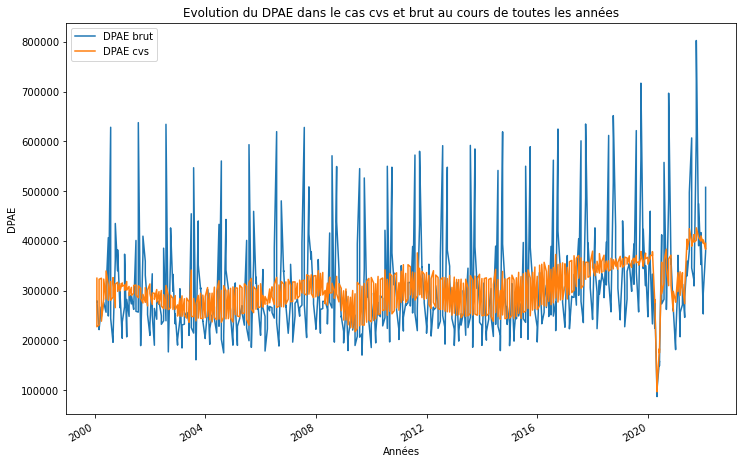

In [3]:
df["DPAE_brut"].plot()
df["DPAE_cvs"].plot()
plt.xlabel("Années")
plt.ylabel("DPAE")
plt.title("Evolution du DPAE dans le cas cvs et brut au cours de toutes les années")
plt.legend(['DPAE brut','DPAE cvs'],loc = 'best')

### 1.2. Découpage de notre dataset en deux catégories de contrat : CDI et CDD

Le projet porte sur l'étude et la prédiction des CDI et des CDD, nous dinstinguons donc les deux catégories sur lesquelles nous appliquerons les mêmes traitements.

#### Dataframe pour les CDI

In [4]:
df_CDI = df.loc[df['Nature_de_contrat'] == 'CDI']

#### Dataframe pour les CDD

In [5]:
df_CDD = df.loc[df['Nature_de_contrat'] == 'CDD de plus d\'un mois']

On procède également à un renommage pour les valeurs afin d'améliorer la clarté et la lecture au sein de notre dataframe

In [6]:
df_CDD['Nature_de_contrat'] = df_CDD['Nature_de_contrat'].replace(['CDD de plus d\'un mois'],'CDD')

C:\Users\Louis\AppData\Local\Temp/ipykernel_17648/1119557990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CDD['Nature_de_contrat'] = df_CDD['Nature_de_contrat'].replace(['CDD de plus d\'un mois'],'CDD')


### 1.3. Visualisation de statistiques globales dans le cas des années et des trimestres

Dans la partie suivante nous allons afficher pour les deux datasets :

     • 1er quartile, 
     • 3ème quartile, 
     • médiane (trait horizontal dans chaque boîte), 
     • valeurs aberrantes : outliers (losanges),
     • moyennes (triangles verts)


### 1.4. Visualisation des statistiques pour les années

#### 1.4.1. Pour les CDI

On affiche les informations essentielles à travers des boîtes à moustaches. De plus elles seront visuellement plus agréables (couleurs et formes) grâce à la bibliothèque 'seaborn'.

<AxesSubplot:xlabel='Annee', ylabel='DPAE_brut'>

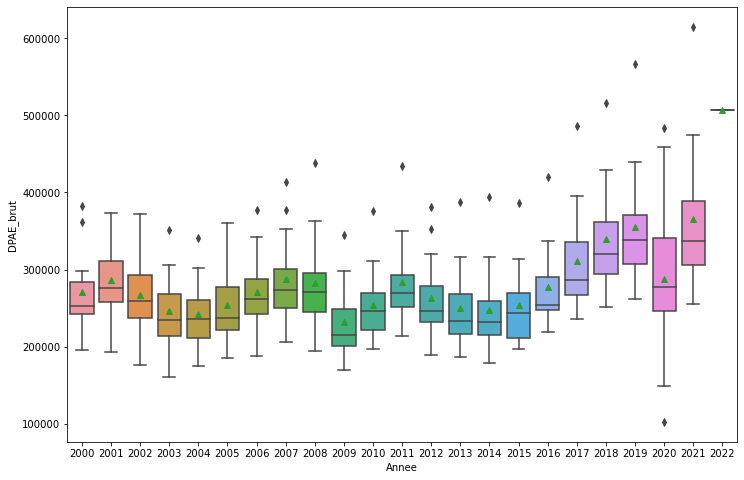

In [7]:
sns.boxplot(x = 'Annee', y = 'DPAE_brut', data = df_CDI, showmeans = True)

#### 1.4.2. Pour les CDD

<AxesSubplot:xlabel='Annee', ylabel='DPAE_brut'>

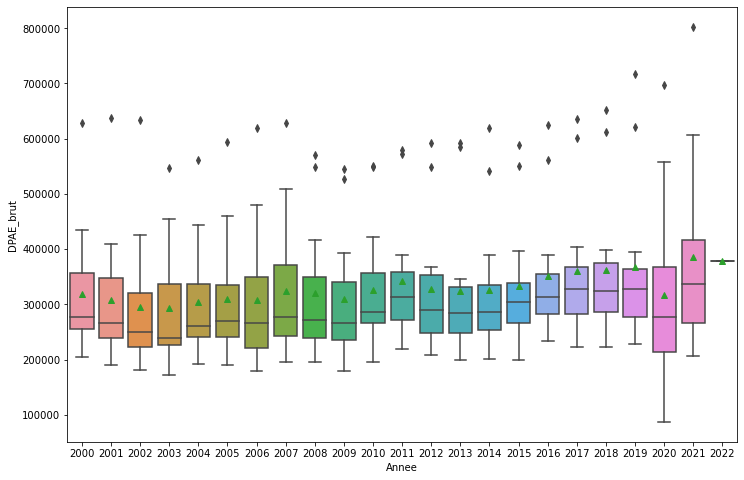

In [8]:
sns.boxplot(x = 'Annee', y = 'DPAE_brut', data = df_CDD, showmeans = True)

### 1.5. Visualisation des statistiques pour les trimestres

#### 1.5.1. Pour les CDI

<AxesSubplot:xlabel='Trimestre', ylabel='DPAE_brut'>

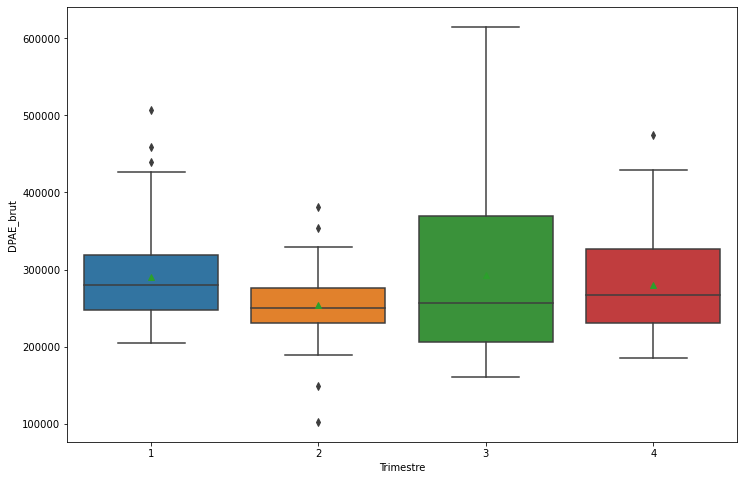

In [9]:
sns.boxplot(x = 'Trimestre', y = 'DPAE_brut', data = df_CDI, showmeans = True)

#### 1.5.2. Pour les CDD

<AxesSubplot:xlabel='Trimestre', ylabel='DPAE_brut'>

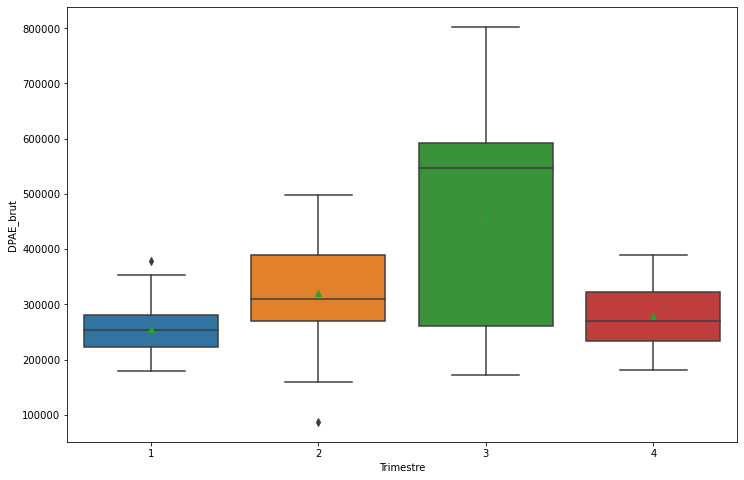

In [10]:
sns.boxplot(x = 'Trimestre', y = 'DPAE_brut', data = df_CDD, showmeans = True)

### 1.6. Visualisation de l'évolution du DPAE brut au cours des années

#### 1.6.1. Premier cas où l'on ne distingue pas les années

Text(0.5, 1.0, 'Evolution du DPAE brut au cours des 20 années pour les CDD')

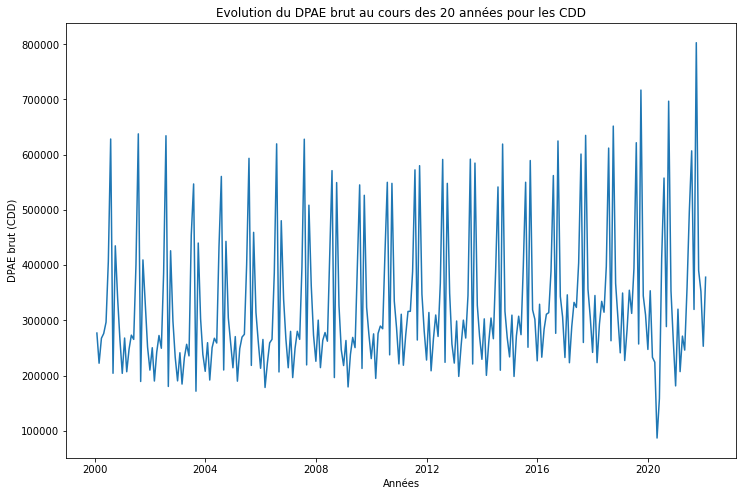

In [11]:
plt.figure(figsize = (12,8))
plt.plot(df_CDD.index,df_CDD['DPAE_brut'])
plt.xlabel("Années")
plt.ylabel("DPAE brut (CDD)")
plt.title("Evolution du DPAE brut au cours des 20 années pour les CDD")

Text(0.5, 1.0, 'Evolution du DPAE brut au cours des 20 années pour les CDI')

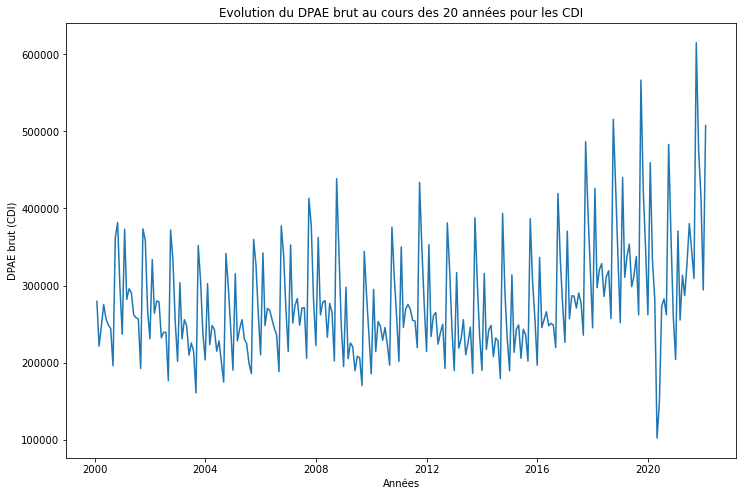

In [12]:
plt.figure(figsize = (12,8))
plt.plot(df_CDI.index,df_CDI['DPAE_brut'])
plt.xlabel("Années")
plt.ylabel("DPAE brut (CDI)")
plt.title("Evolution du DPAE brut au cours des 20 années pour les CDI")

#### 1.6.2. Second cas où l'on instaure une "scission" entre les années pour distinguer visuellement 

Text(0.5, 1.0, 'Evolution du DPAE brut au cours des 20 années pour les CDD')

<Figure size 864x576 with 0 Axes>

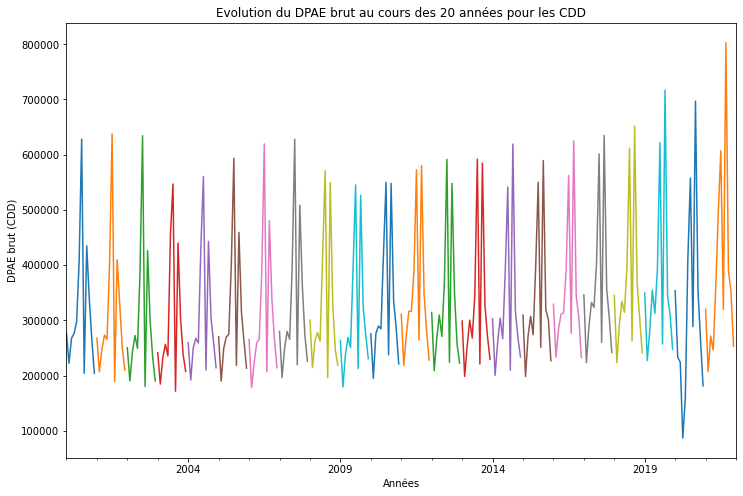

In [13]:
plt.figure()
pivot = pd.pivot_table(df_CDD, values = 'DPAE_brut', index = ['Dernier_jour_du_mois'], columns = ['Annee'])
pivot.plot(legend = None, figsize =(12,8))
plt.xlabel("Années")
plt.ylabel("DPAE brut (CDD)")
plt.title("Evolution du DPAE brut au cours des 20 années pour les CDD")

Text(0.5, 1.0, 'Evolution du DPAE brut au cours des 20 années pour les CDI')

<Figure size 864x576 with 0 Axes>

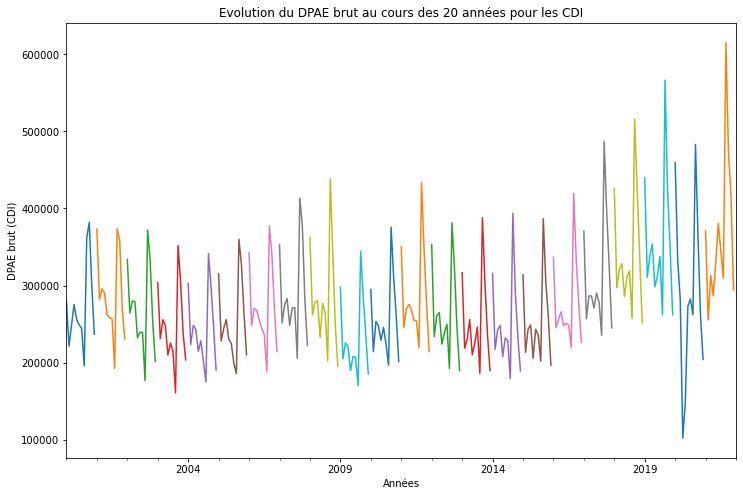

In [14]:
plt.figure()
pivot = pd.pivot_table(df_CDI, values = 'DPAE_brut',  index = ['Dernier_jour_du_mois'], columns = ['Annee'])
pivot.plot(legend = None, figsize =(12,8))
plt.xlabel("Années")
plt.ylabel("DPAE brut (CDI)")
plt.title("Evolution du DPAE brut au cours des 20 années pour les CDI")

# 1-2. Question 1 - Partie 2 : Visualisation des deux bases de données (EESSA)

### 1.1. Initialisation du dataset

Pour cette seconde base de données (EESSA), nous procédons de la même manière en renommant le fichier excel "Tableau_Emploi-Salarie-Trimestre-National_09032022.xlsx" en "EESSA.csv" que nous venons lire grâce à un autre read_csv.

In [15]:
df2 = pd.read_csv("EESSA.csv", header=0, parse_dates = [0], index_col=0, sep=";")
df2 = df2.T #on transpose pour avoir un dataframe correct

### 1.2. Opérations de traitement sur le dataframe

#### On vient redéfinir notre dataframe en selectionnant les lignes qui nous intéressent et en redonnant de nouveaux index.

In [16]:
data = df2[3:]
data.index = pd.to_datetime(data.index)
data.insert(0, "Annees", data.index.year)
data.insert(1,"Trimestre", data.index.month)

#### On définit une fonction qui va nous permettre de transformer les valeurs en float

In [17]:
def obj_to_int(x):
    if(x[:x.find(' ')].replace(",",".") == ''):
        return pd.NA
    elif (len(x)<5):
        return pd.NA
    else:
        return float(x[:x.find(' ')].replace(",","."))

In [18]:
for x in data.columns[2:]:
    data[x] = data[x].map(lambda i: obj_to_int(i))

C:\Users\Louis\AppData\Local\Temp/ipykernel_17648/664041900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x] = data[x].map(lambda i: obj_to_int(i))


### 1.3. Série temporelle qui vient sommer l'ensemble des secteurs

On vient créer cette nouvelle colonne "Somme" à notre dataframe.

In [19]:
data.insert(len(data.columns),"Somme", data.iloc[2:].sum(axis=1))

On vient visualiser l'aspect générale de cette nouvelle Somme.

Text(0, 0.5, 'Nombre de salariés')

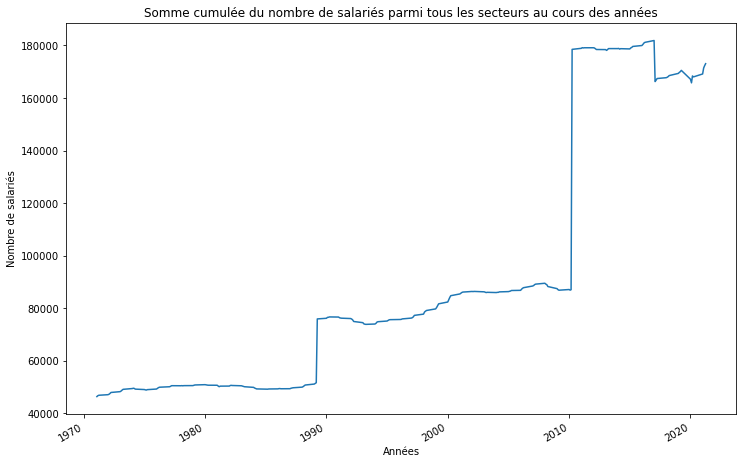

In [20]:
data["Somme"].plot()
plt.title("Somme cumulée du nombre de salariés parmi tous les secteurs au cours des années")
plt.xlabel("Années")
plt.ylabel("Nombre de salariés")

**Observations :** 
On observe une hausse des emplois au fils des années qui peut potentiellement s'expliquer grâce à la création de nouveux secteurs dans certains domaines.
Le nombre d'emplois de salariés trimestriels "Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée", est en augmentation depuis les années 1970, il n'a jamais connu de réelles baisses au cours de toutes ces années. 
En 1990, il y a le développement de nombreux secteurs qui permettent de créer de nombreux emplois et donc l'embauche de multiples salariés. On a une hausse de près de 50%. De même pour l'année 2010 où l'on a une hausse du nombre de salariés d'environ 120%.

### 1.4. Comme précédemment, nous allons distinguer plusieurs cas : entre 2 et 5. Globalement la tâche est là même entre les catégories, donc pour limiter la redondance on ne se limite qu'à deux secteurs

#### 1.4.1. On s'intéresse au premier secteur (choix arbitraire)
Le secteur selectionné est "Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée".

On se positionne donc sur notre secteur d'intérêt en conservant les colonnes utiles. En parallèle on réalise certains traitements afin de nettoyer notre dataframe.

In [21]:
secteur1 = data.iloc[3:,[0,1,2]]
secteur1.dropna(inplace = True)

In [22]:
secteur1["Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée"] = pd.to_numeric(secteur1["Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée"])

On vient visualiser des statistiques générales ainsi que des courbes issues de notre dataframe. On observe ces statistiques aussi bien pour les années (à partir de 2000) que pour les trimestres.

Text(0.5, 1.0, 'Evolution de la moyenne du nombre de salariés par année pour le domaine des marchands')

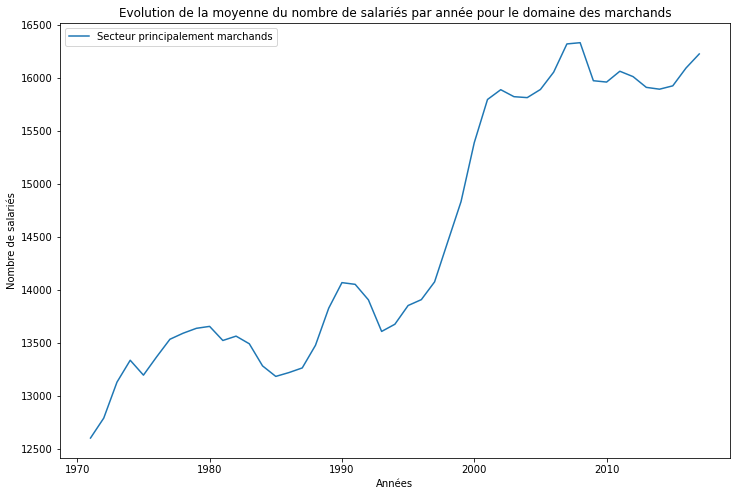

In [23]:
affichage_stat1 = secteur1.iloc[:,[0,2]].groupby(by="Annees").mean()
affichage_stat1.plot()
plt.legend(["Secteur principalement marchands"], loc = 'best')
plt.xlabel("Années")
plt.ylabel("Nombre de salariés")
plt.title("Evolution de la moyenne du nombre de salariés par année pour le domaine des marchands")

Afin de pouvoir afficher correctement les graphiques, on ne s'intéresse qu'aux années 2000 jusqu'à la fin de notre dataframe soit 2017

<AxesSubplot:title={'center':'Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'}, xlabel='[Trimestre]'>

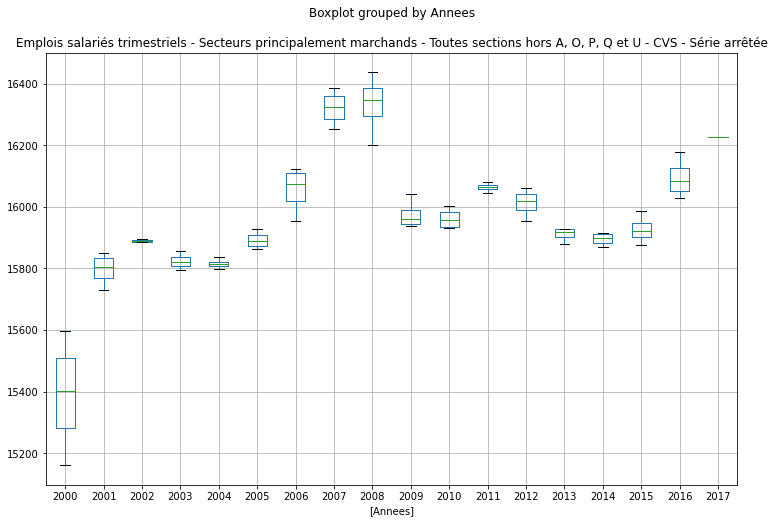

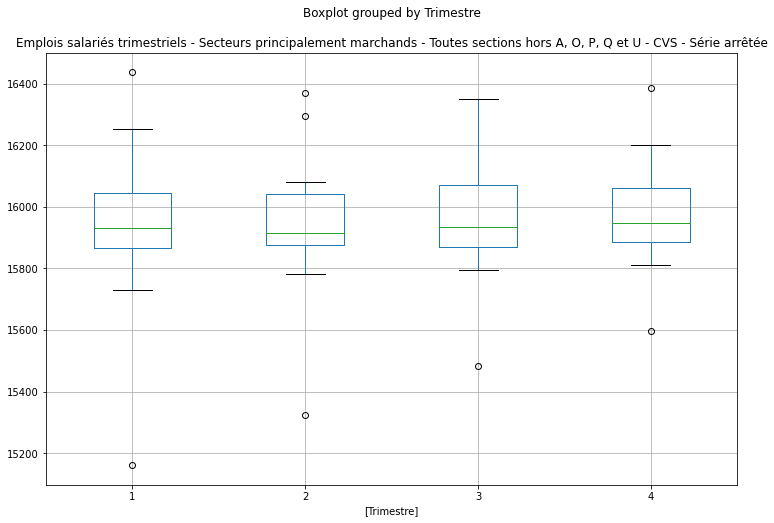

In [24]:
secteur1.iloc[:,[0,2]]['2000':].boxplot(by="Annees")
secteur1.iloc[:,[1,2]]['2000':].boxplot(by="Trimestre")

#### 1.4.2.  On s'intéresse au second secteur (choix à nouveau purement arbitraire)
Le secteur selectionné est "Emplois salariés trimestriels - Construction - A17 : FZ - CVS". On raisonne de la même manière que précédemment.

In [25]:
secteur2 = data.iloc[3:,[0,1,12]]
secteur2.dropna(inplace = True)

Text(0.5, 1.0, 'Evolution de la moyenne du nombre de salariés par année dans le domaine de la construction')

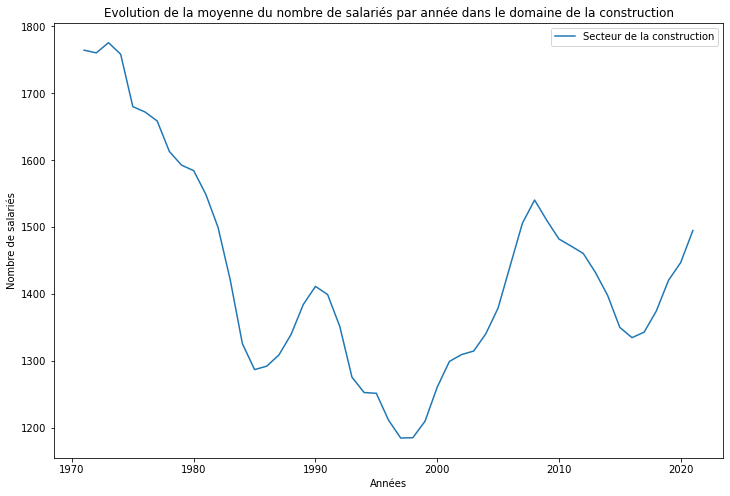

In [26]:
affichage_stat2 = secteur2.iloc[:,[0,2]].groupby(by="Annees").mean()
affichage_stat2.plot()
plt.legend(["Secteur de la construction"], loc = 'best')
plt.xlabel("Années")
plt.ylabel("Nombre de salariés")
plt.title("Evolution de la moyenne du nombre de salariés par année dans le domaine de la construction")

<AxesSubplot:title={'center':'Emplois salariés trimestriels - Construction - A17 : FZ - CVS'}, xlabel='[Trimestre]'>

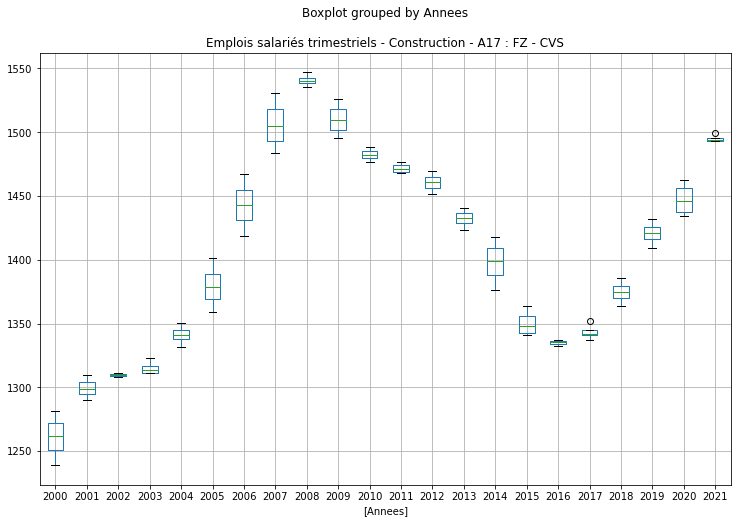

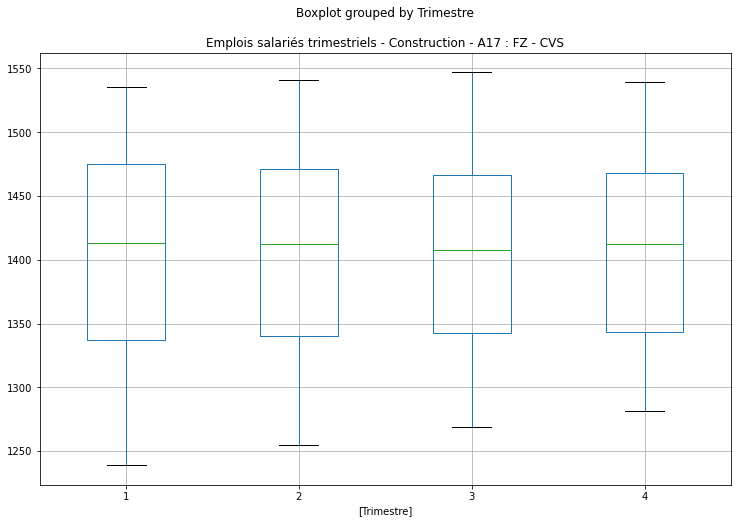

In [27]:
secteur2.iloc[:,[0,2]]['2000':].boxplot(by="Annees")
secteur2.iloc[:,[1,2]]['2000':].boxplot(by="Trimestre")

# 2. Question 2 : Evaluer la saisonnalité et la tendance de séries temporelles

### 2.1. Evaluation de la saisonnalité des CDD et CDI sur DPAE

Afin de mener correctement cette étude de saisonnalité, nous nous intéresssons à l'évolution du cours du DPAE pour toutes les années au cours des 12 mois.

#### 2.1.1 Pour les CDI

In [28]:
piv_CDI = pd.pivot_table(df_CDI,values='DPAE_brut', index=df_CDI.index.month,columns=['Annee'])

Text(0.5, 1.0, 'Evolution du DPAE brut au cours des 12 mois pour chaque année (CDI)')

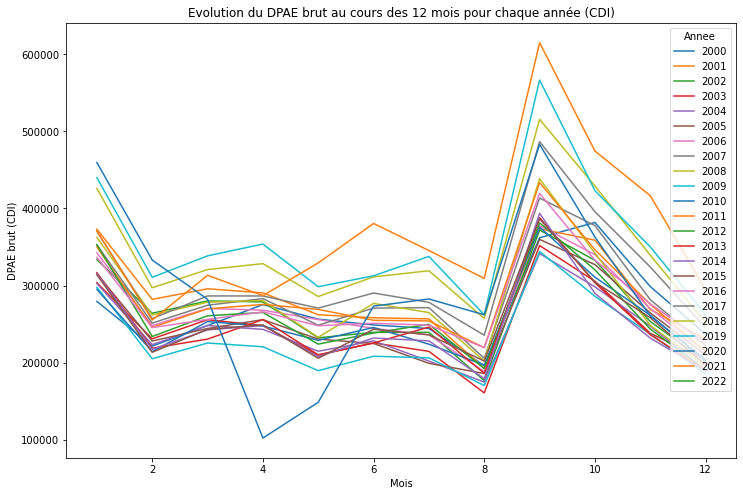

In [29]:
piv_CDI.plot(legend=True)
plt.xlabel("Mois")
plt.ylabel("DPAE brut (CDI)")
plt.title("Evolution du DPAE brut au cours des 12 mois pour chaque année (CDI)")

#### 2.1.2. Pour les CDD

In [30]:
piv_CDD = pd.pivot_table(df_CDD,values='DPAE_brut', index=df_CDI.index.month,columns=['Annee'])

Text(0.5, 1.0, 'Evolution du DPAE brut au cours des 12 mois pour chaque année (CDD)')

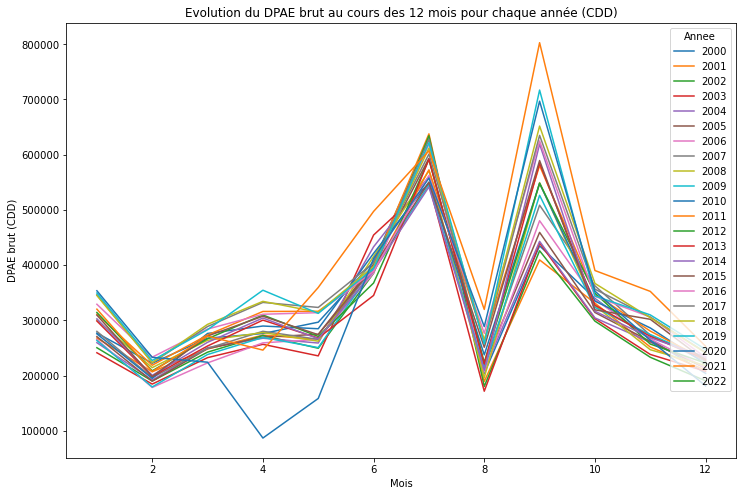

In [31]:
piv_CDD.plot(legend=True)
plt.xlabel("Mois")
plt.ylabel("DPAE brut (CDD)")
plt.title("Evolution du DPAE brut au cours des 12 mois pour chaque année (CDD)")

### 2.2. Zoom sur les trois premières années 

On restreint notre étude et on ne s'intéresse qu'aux 36 premiers mois (soit les 3 premières années), afin d'observer une saisonnalité apparente (ou non).

#### 2.2.1. Pour les CDI

Text(0.5, 1.0, 'Evolution du DPAE brut au cours des 36 premiers mois (CDI)')

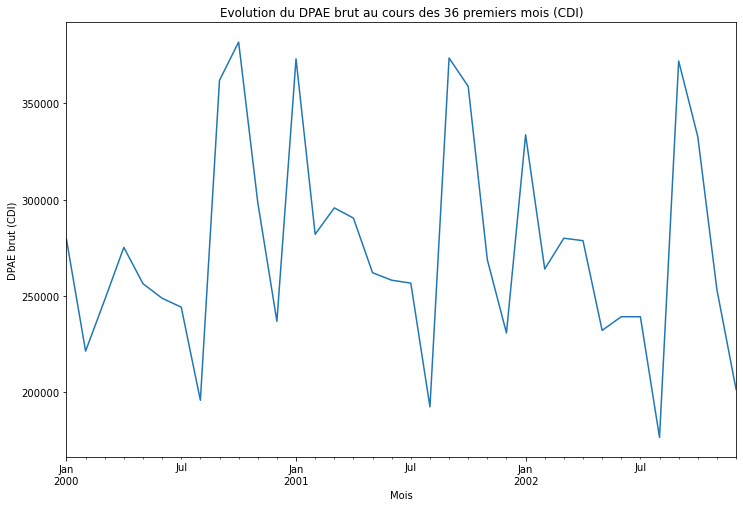

In [32]:
df_CDI['DPAE_brut'].iloc[0:36].plot()
plt.xlabel("Mois")
plt.ylabel("DPAE brut (CDI)")
plt.title("Evolution du DPAE brut au cours des 36 premiers mois (CDI)")

Text(0.5, 1.0, "Courbe d'autocorrelation du DPAE brut au cours des 36 premiers mois (CDI)")

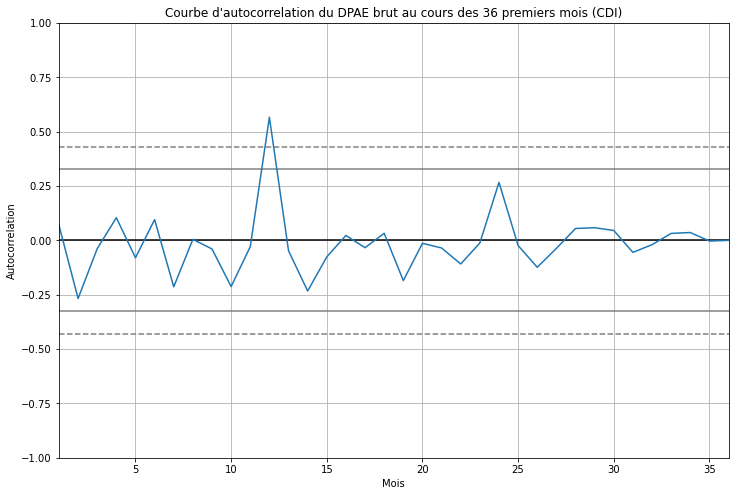

In [33]:
autocorrelation_plot(df_CDI['DPAE_brut'].iloc[0:36])
plt.xlabel("Mois")
plt.ylabel("Autocorrelation")
plt.title("Courbe d'autocorrelation du DPAE brut au cours des 36 premiers mois (CDI)")

#### 2.2.2. Pour les CDD

Text(0.5, 1.0, 'Evolution du DPAE brut au cours des 36 premiers mois (CDD)')

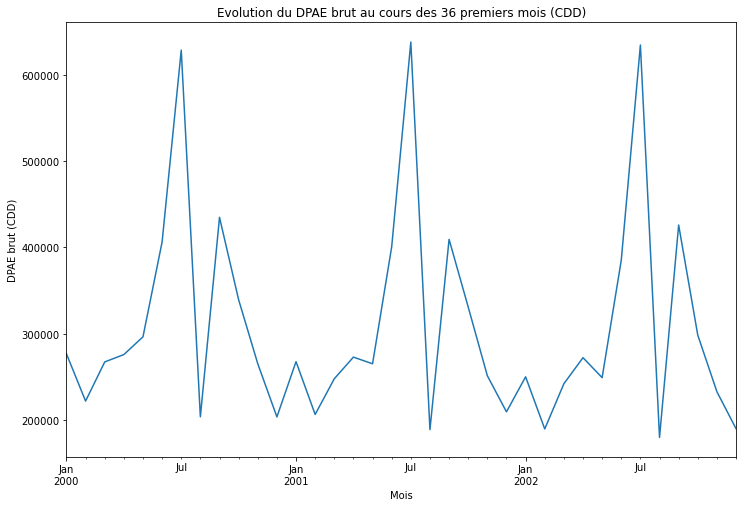

In [34]:
df_CDD['DPAE_brut'].iloc[0:36].plot()
plt.xlabel("Mois")
plt.ylabel("DPAE brut (CDD)")
plt.title("Evolution du DPAE brut au cours des 36 premiers mois (CDD)")

Text(0.5, 1.0, "Courbe d'autocorrelation du DPAE brut au cours des 36 premiers mois (CDD)")

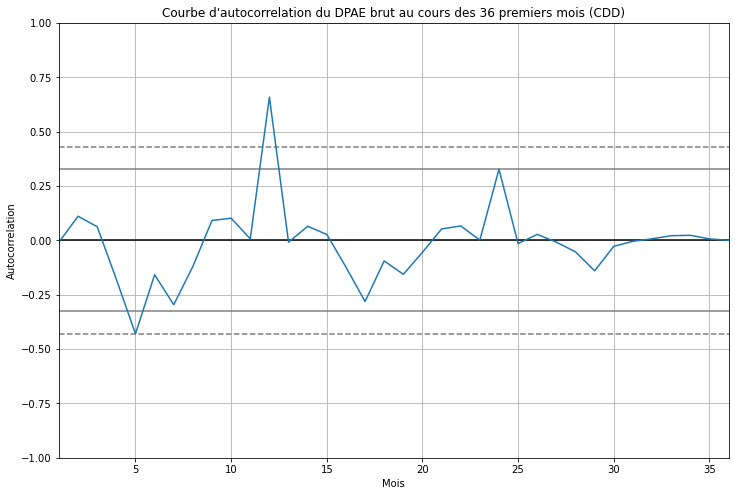

In [35]:
autocorrelation_plot(df_CDD['DPAE_brut'].iloc[0:36])
plt.xlabel("Mois")
plt.ylabel("Autocorrelation")
plt.title("Courbe d'autocorrelation du DPAE brut au cours des 36 premiers mois (CDD)")

### 2.3. Décomposition saisonnière de nos datasets

Dans cette troisième partie nous allons distinguer notre signal initial en 3 catégories : la tendance, la saisonnalité et les résidus.

#### 2.3.1. Pour les CDI

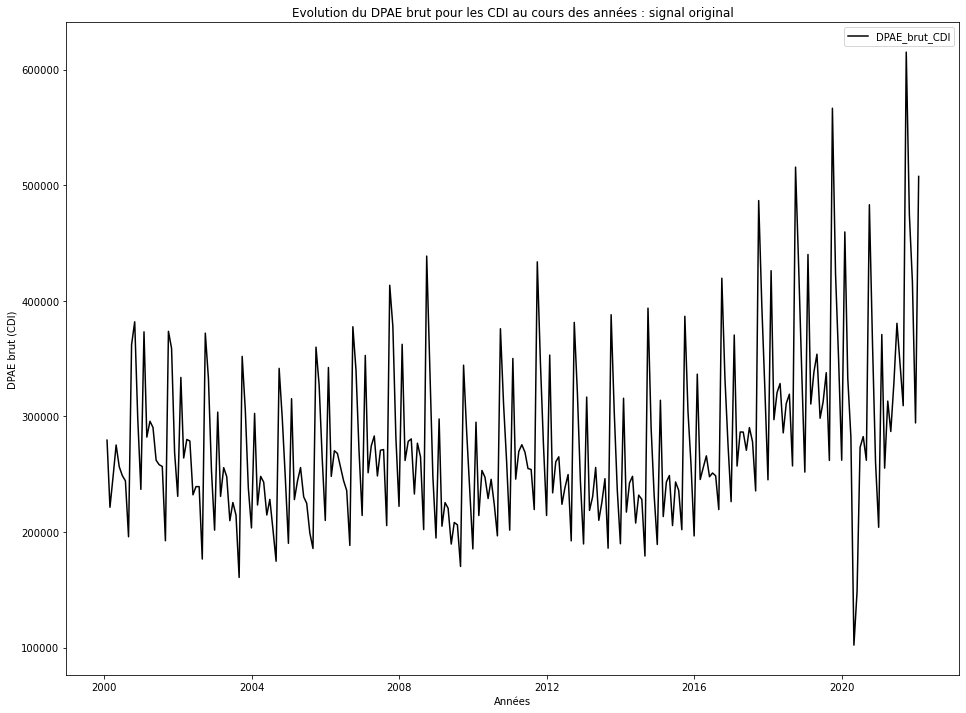

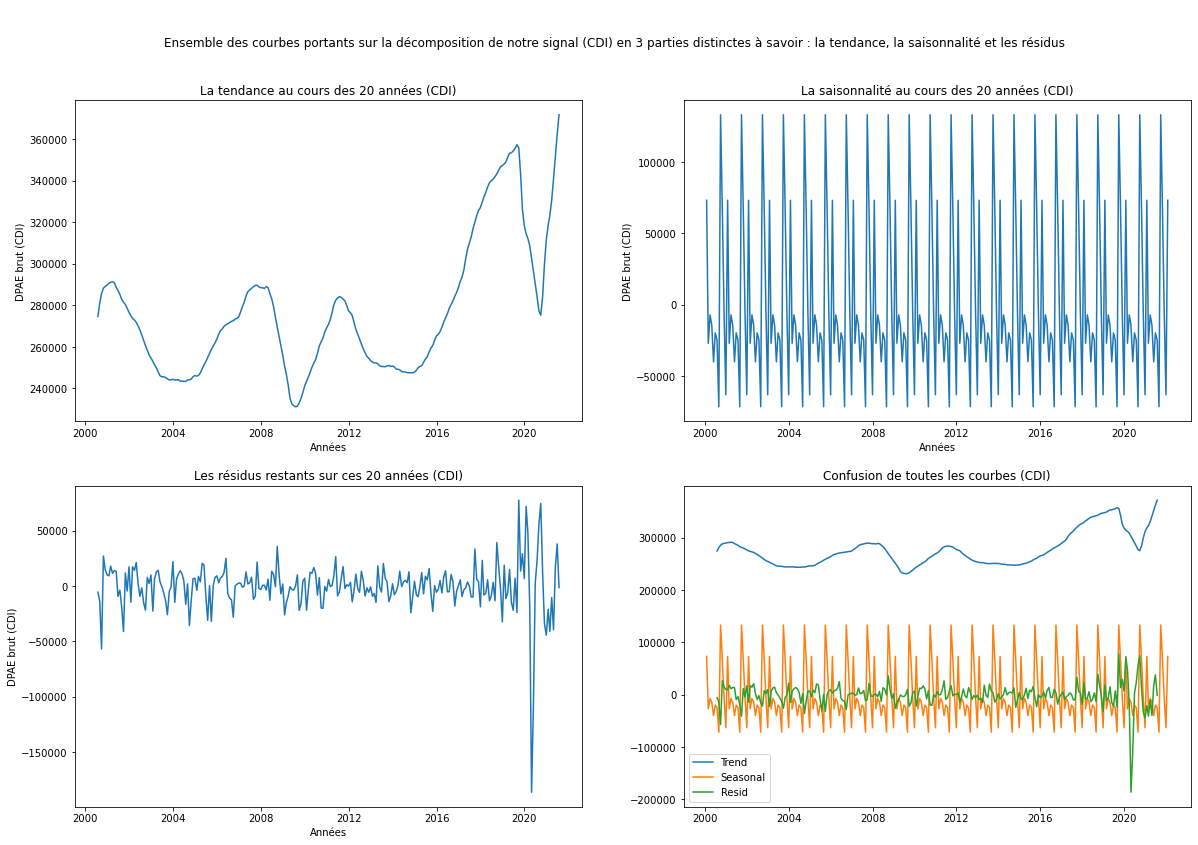

In [36]:
decomposition = seasonal_decompose(df_CDI['DPAE_brut'], period=12) #La période correspond à 12 mois soit 1 an

seasonal = seasonal_decompose(df_CDI['DPAE_brut']).seasonal
trend = seasonal_decompose(df_CDI['DPAE_brut']).trend
resid = seasonal_decompose(df_CDI['DPAE_brut']).resid

plt.figure(1 , figsize =(16,12))
plt.plot(df_CDI.index, df_CDI['DPAE_brut'], 'k')
plt.legend(['DPAE_brut_CDI'])
plt.xlabel("Années")
plt.ylabel("DPAE brut (CDI)")
plt.title("Evolution du DPAE brut pour les CDI au cours des années : signal original")

plt.figure(2 , figsize =(20,13))
plt.suptitle("\n\nEnsemble des courbes portants sur la décomposition de notre signal (CDI) en 3 parties distinctes à savoir : la tendance, la saisonnalité et les résidus")

plt.subplot(2, 2, 1)
plt.plot(df_CDI.index,trend)
plt.xlabel("Années")
plt.ylabel("DPAE brut (CDI)")
plt.title("La tendance au cours des 20 années (CDI)")

plt.subplot(2, 2, 2)
plt.plot(df_CDI.index,seasonal)
plt.xlabel("Années")
plt.ylabel("DPAE brut (CDI)")
plt.title("La saisonnalité au cours des 20 années (CDI)")

plt.subplot(2, 2, 3)
plt.plot(df_CDI.index,resid) #ce qui reste après avoir éliminé les tendances et la saisonnalité
plt.xlabel("Années")
plt.ylabel("DPAE brut (CDI)")
plt.title("Les résidus restants sur ces 20 années (CDI)")

plt.subplot(2, 2, 4)
plt.plot(df_CDI.index,trend)
plt.plot(df_CDI.index,seasonal)
plt.plot(df_CDI.index,resid)
plt.title("Confusion de toutes les courbes (CDI)")
plt.legend(['Trend', 'Seasonal', 'Resid'],loc='lower left')
plt.show()

#### On cherche à comprendre la saisonnalité

Text(0.5, 1.0, 'La saisonnalité (CDI)')

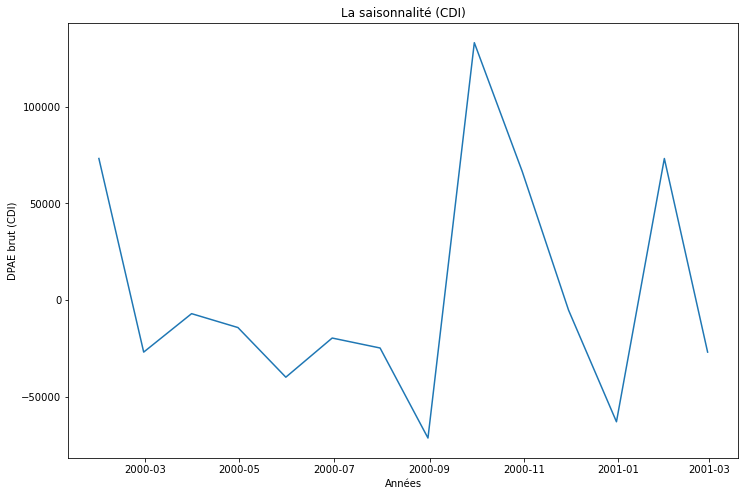

In [37]:
plt.figure(figsize =(12,8))
plt.plot(df_CDI.iloc[0:14].index,seasonal[0:14])
plt.xlabel("Années")
plt.ylabel("DPAE brut (CDI)")
plt.title("La saisonnalité (CDI)")

**Les CDI présentent une saisonnalité de 1 an. Ainsi chaque année on a des périodes d'embauches similaires avec un fort taux d'embauche notamment en février et en octobre. A contrario, le taux d'embauche est au plus faible en septembre et en janvier. Cela peut probablement s'expliquer grâce à l'embauche de jeunes étudiants qui sortent d'écoles de commerce, d'ingénieurs, ou autres et qui suite à leur PFE sont embauchés au sein de la même boîte où ils exerçaient leur stage.**

**Concernant la tendance, on remarque qu'il y a eu une forte décroissance à partir de l'année 2001 jusqu'à 2004. On peut certainement expliquer cela par le Krach boursier de 2001/2002. Suite à ça, le nombre de CDI revient petit à petit à la normal (comme en 2000/2001) juste avant de chuter drastiquement une fois de plus en 2008. Cette chute s'explique potentiellement par la crise financière mondiale de 2007/2008. On retrouve ce même schéma en 2012 aec une nouvelle chute puisque 2012 est considérée comme "l'année du basculement" ou "l'année de toutes les faiblesses de la France". Suite à cela, le nombre de CDI s'envole et augmentent d'environ de 30% par rapport à l'an 2000 afin de rechuter une nouvelle fois à partir de 2019 à cause de la crise sanitaire due à l'épidémie mondiale du COVID-19.**  

#### 2.3.2. Pour les CDD

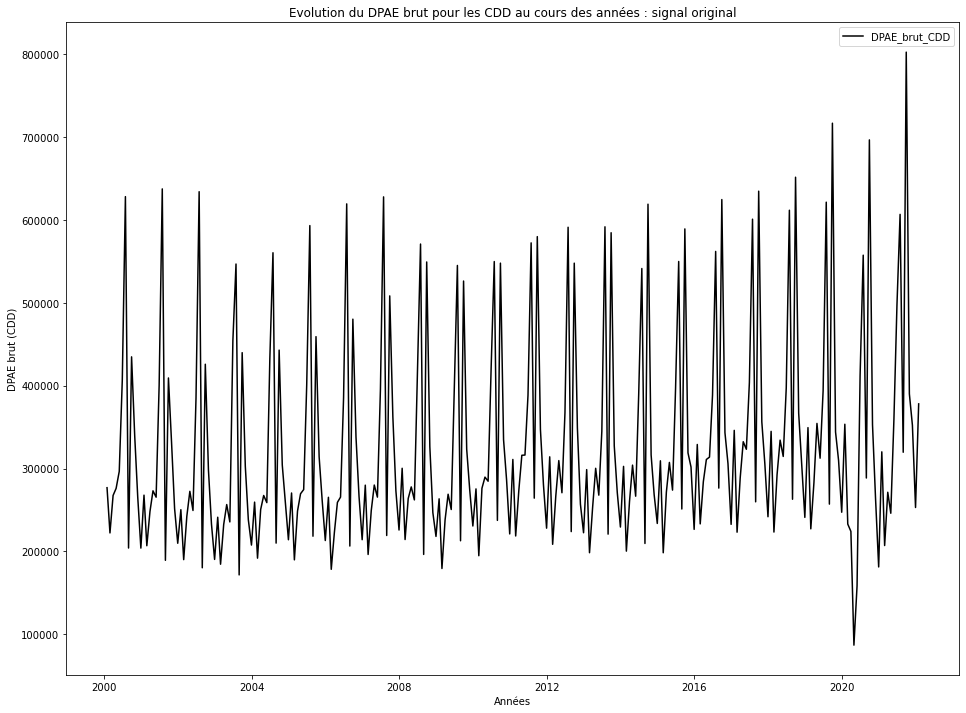

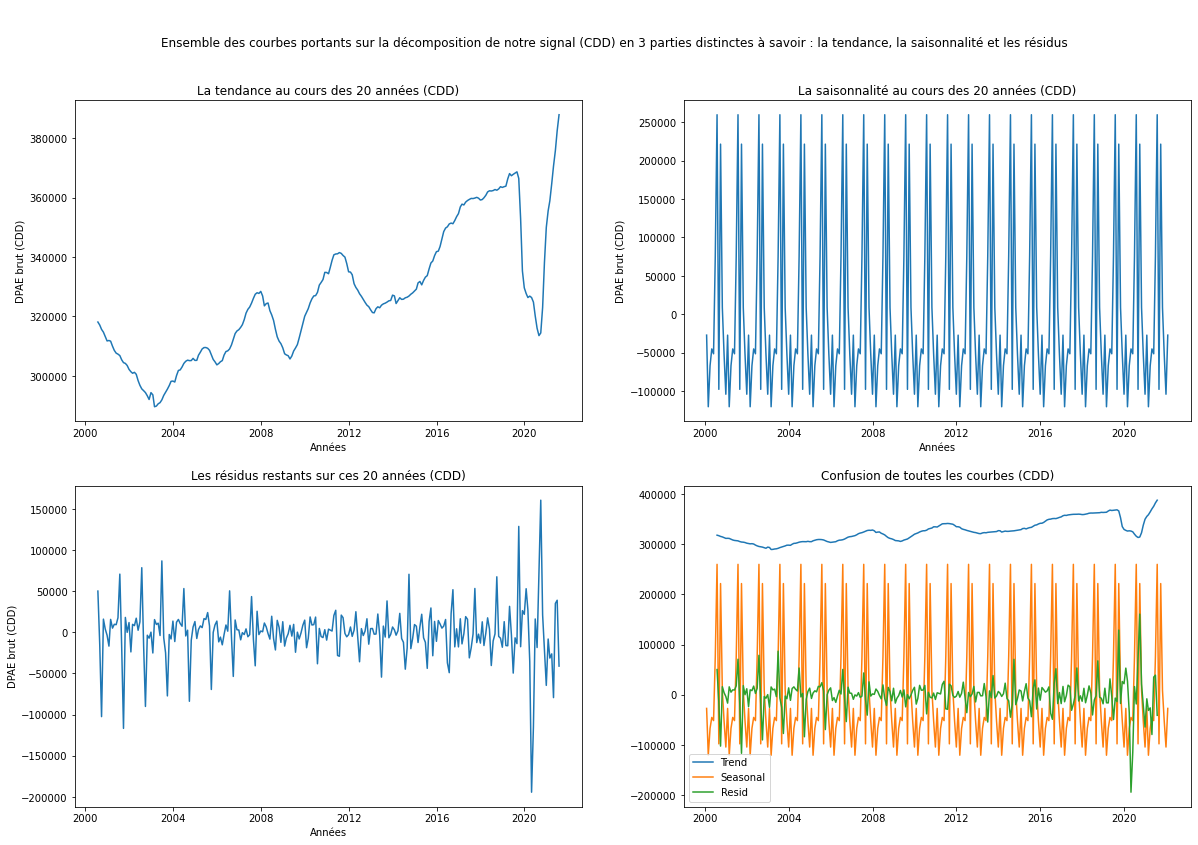

In [38]:
decomposition = seasonal_decompose(df_CDD['DPAE_brut'], period=12) #La période correspond à 12 mois soit 1 an

seasonal = seasonal_decompose(df_CDD['DPAE_brut']).seasonal
trend = seasonal_decompose(df_CDD['DPAE_brut']).trend
resid = seasonal_decompose(df_CDD['DPAE_brut']).resid

plt.figure(1 , figsize =(16,12))
plt.plot(df_CDD.index, df_CDD['DPAE_brut'], 'k')
plt.legend(['DPAE_brut_CDD'])
plt.xlabel("Années")
plt.ylabel("DPAE brut (CDD)")
plt.title("Evolution du DPAE brut pour les CDD au cours des années : signal original")

plt.figure(2 , figsize =(20,13))
plt.suptitle("\n\nEnsemble des courbes portants sur la décomposition de notre signal (CDD) en 3 parties distinctes à savoir : la tendance, la saisonnalité et les résidus")

plt.subplot(2, 2, 1)
plt.plot(df_CDD.index,trend)
plt.xlabel("Années")
plt.ylabel("DPAE brut (CDD)")
plt.title("La tendance au cours des 20 années (CDD)")

plt.subplot(2, 2, 2)
plt.plot(df_CDD.index,seasonal)
plt.xlabel("Années")
plt.ylabel("DPAE brut (CDD)")
plt.title("La saisonnalité au cours des 20 années (CDD)")

plt.subplot(2, 2, 3)
plt.plot(df_CDD.index,resid) #ce qui reste après avoir éliminé les tendances et la saisonnalité
plt.xlabel("Années")
plt.ylabel("DPAE brut (CDD)")
plt.title("Les résidus restants sur ces 20 années (CDD)")

plt.subplot(2, 2, 4)
plt.plot(df_CDD.index,trend)
plt.plot(df_CDD.index,seasonal)
plt.plot(df_CDD.index,resid)
plt.title("Confusion de toutes les courbes (CDD)")
plt.legend(['Trend', 'Seasonal', 'Resid'],loc='lower left')
plt.show()

#### On cherche à nouveau à comprendre la saisonnalité

Text(0.5, 1.0, 'La saisonnalité (CDD)')

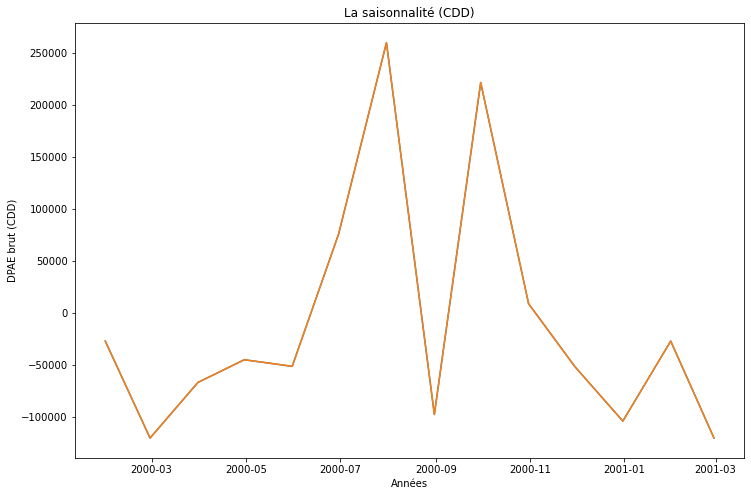

In [39]:
plt.figure(figsize =(12,8))
plt.plot(df_CDD.iloc[0:14].index,seasonal[0:14])
plt.plot(df_CDI.iloc[0:14].index,seasonal[0:14])
plt.xlabel("Années")
plt.ylabel("DPAE brut (CDD)")
plt.title("La saisonnalité (CDD)")

**Pour les CDD, on remarque qu'il y a un fort taux d'embauche en août et en octobre. On remarque que tout le long de l'été, cela ne cesse d'augmenter et cela peut certainement s'expliquer avec l'ensemble des étudiants qui finissent leurs études et qui cherchent un job d'été. De Novembre à Janvier, il y a une baisse assez importante qui peut s'expliquer par la période de fêtes et par la période d'examens chez les étudiants, ce qui les freinent à s'engager dans un travail qui nécessitera un certain investissement. Egalement entre août et octobre il y a la rentrée, ce qui pousse les jeunes à quitter leur travail pour reprendre les cours et potentiellement déménager et s'installer dans une nouvelle ville.**

**Vis-à-vis de la tendance, on remarque les mêmes chutes qui peuvent s'expliquer de manière identique avec 2001-2003, 2008-2009, 2012-2013 et 2019-2021. Toutefois on peut aussi préciser que ces chutes sont moins importantes et se font moins ressentir côté CDD. De plus, on remarque que globalement la tendance des CDD est à la hausse, en pleine croissance alors que pour les CDI elle est beaucoup plus volatile. On peut expliquer ceci par le fait que du point de vue d'un employeur, un CDD engage à moins qu'un CDI. Ainsi en post période de crise, les entreprises devaient certainement plus favoriser une embauche via un CDD que via un CDI pour s'en remettre.**

### 2.4. Évaluation de la saisonnalité des secteurs sélectionnés sur EESSA

A nouveau, nous procédons de la même manière avec notre second dataframe (EESSA) que l'on vient une fois de plus séparer en deux pour distinguer les secteurs.

#### 2.4.1. Pour le 1er secteur : les marchands

In [40]:
piv_marchand = pd.pivot_table(secteur1, values = 'Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée', columns = ["Trimestre"], index = ['Annees'])

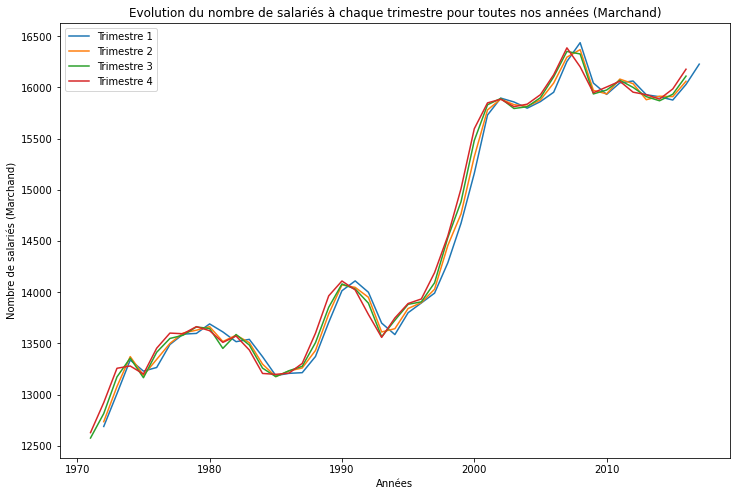

In [41]:
piv_marchand.plot(legend = False)
plt.xlabel("Années")
plt.ylabel("Nombre de salariés (Marchand)")
plt.title("Evolution du nombre de salariés à chaque trimestre pour toutes nos années (Marchand)")
plt.legend(['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4'], loc = 'best')

#### 2.4.2. Pour le 2nd secteur : la construction

In [42]:
piv_construction = pd.pivot_table(secteur2, values = 'Emplois salariés trimestriels - Construction - A17 : FZ - CVS', columns = ["Trimestre"], index = ['Annees'])

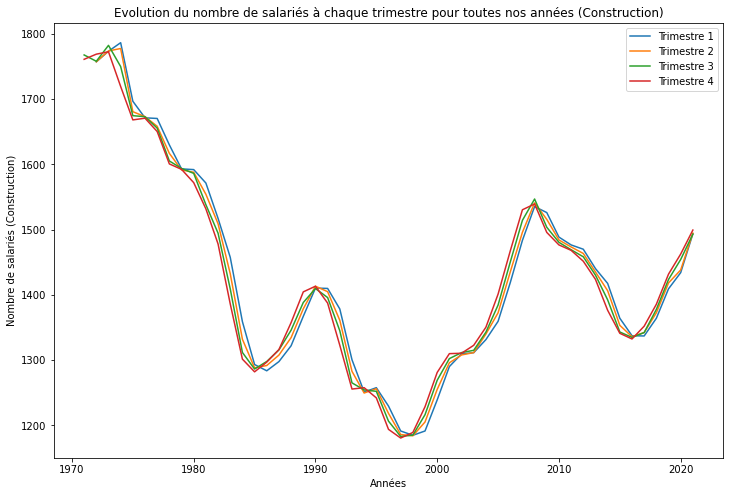

In [43]:
piv_construction.plot(legend = False)
plt.xlabel("Années")
plt.ylabel("Nombre de salariés (Construction)")
plt.title("Evolution du nombre de salariés à chaque trimestre pour toutes nos années (Construction)")
plt.legend(['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4'], loc = 'best')

### 2.5. Nouveau zoom

#### 2.5.1. Pour le 1er secteur : les marchands

Text(0.5, 1.0, 'Evolution du nombre de salariées au cours des 30 premiers trimestres (Marchand)')

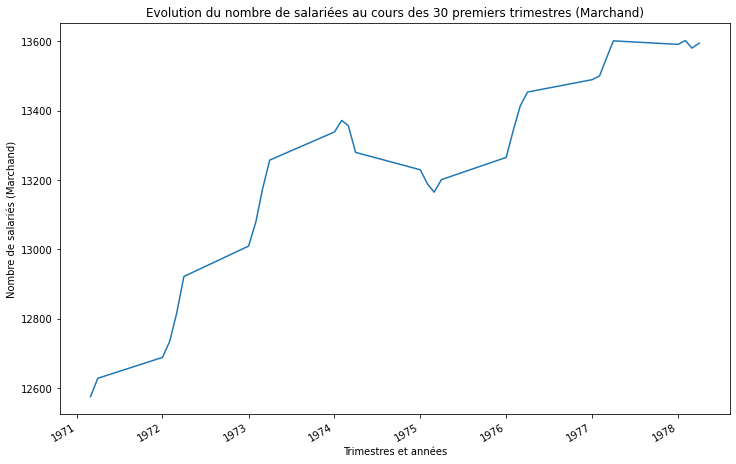

In [44]:
secteur1["Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée"].iloc[0:30].plot()
plt.xlabel("Trimestres et années")
plt.ylabel("Nombre de salariés (Marchand)")
plt.title("Evolution du nombre de salariées au cours des 30 premiers trimestres (Marchand)")

Text(0.5, 1.0, "Courbe d'autocorrelation du DPAE brut au cours des 30 premiers trimestres (Marchand)")

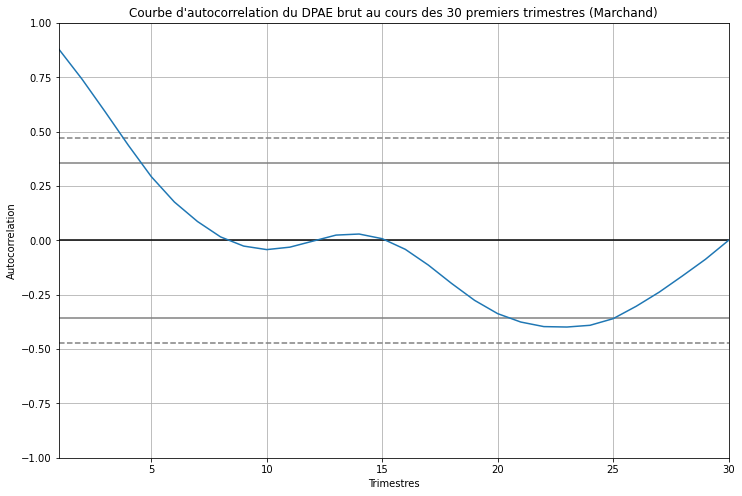

In [45]:
autocorrelation_plot(secteur1["Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée"].iloc[0:30])
plt.xlabel("Trimestres")
plt.ylabel("Autocorrelation")
plt.title("Courbe d'autocorrelation du DPAE brut au cours des 30 premiers trimestres (Marchand)")

#### 2.5.2. Pour le 2nd secteur : la construction

Text(0.5, 1.0, 'Evolution du nombre de salariées au cours des 30 premiers trimestres (Construction)')

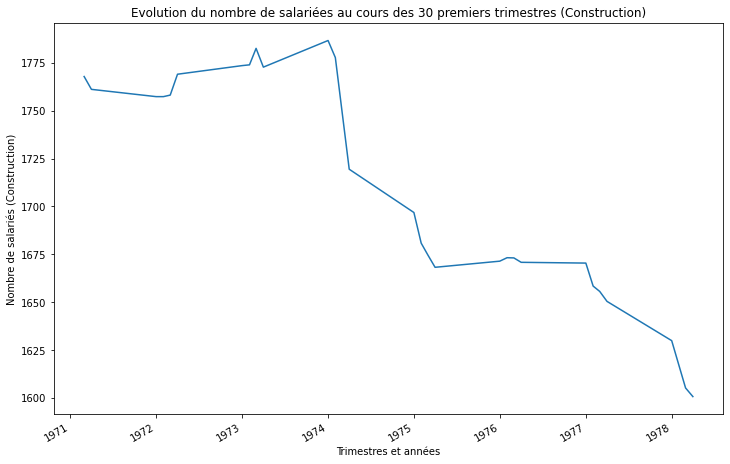

In [46]:
secteur2["Emplois salariés trimestriels - Construction - A17 : FZ - CVS"].iloc[0:30].plot()
plt.xlabel("Trimestres et années")
plt.ylabel("Nombre de salariés (Construction)")
plt.title("Evolution du nombre de salariées au cours des 30 premiers trimestres (Construction)")

Text(0.5, 1.0, "Courbe d'autocorrelation du DPAE brut au cours des 30 premiers trimestres (Construction)")

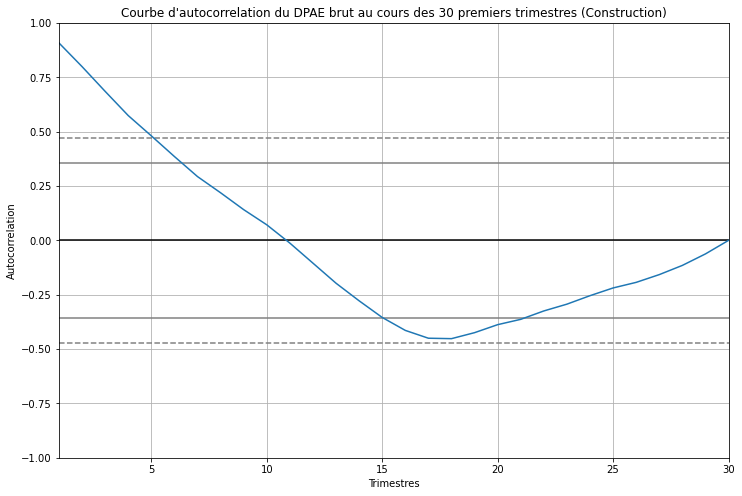

In [47]:
autocorrelation_plot(secteur2["Emplois salariés trimestriels - Construction - A17 : FZ - CVS"].iloc[0:30])
plt.xlabel("Trimestres")
plt.ylabel("Autocorrelation")
plt.title("Courbe d'autocorrelation du DPAE brut au cours des 30 premiers trimestres (Construction)")

Pour arima (construction) : p = 4

### 2.6. Décomposition saisonnière

#### 2.6.1. Pour le 1er secteur : les Marchands

In [48]:
marchand = secteur1.iloc[:,2]

On regarde s'il y a une saisonalité sur une plage de 12 trimestres donc 3 ans.

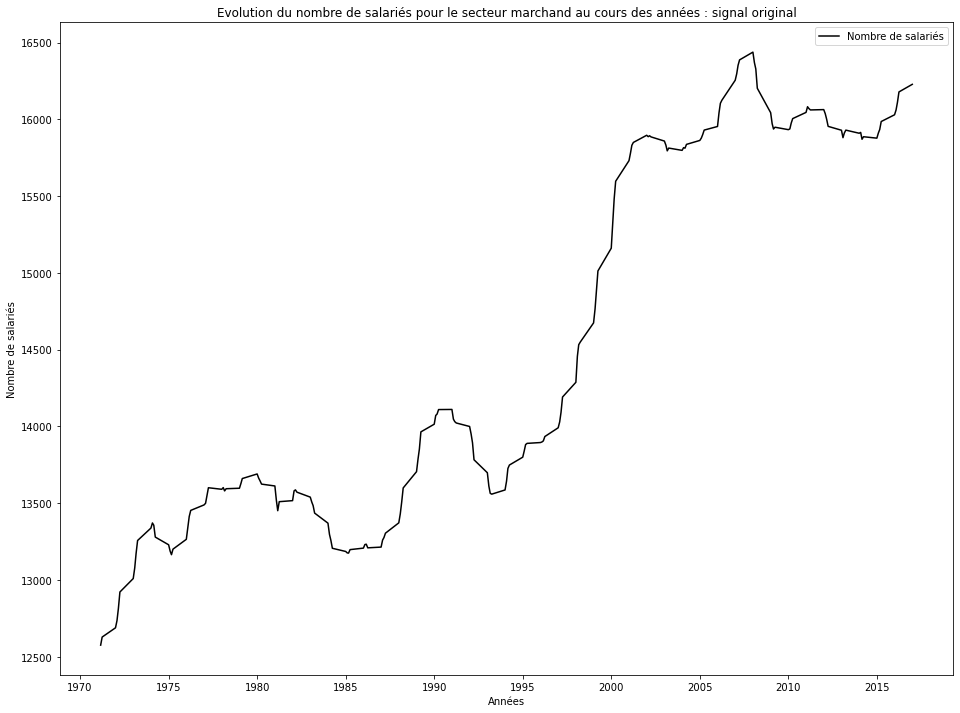

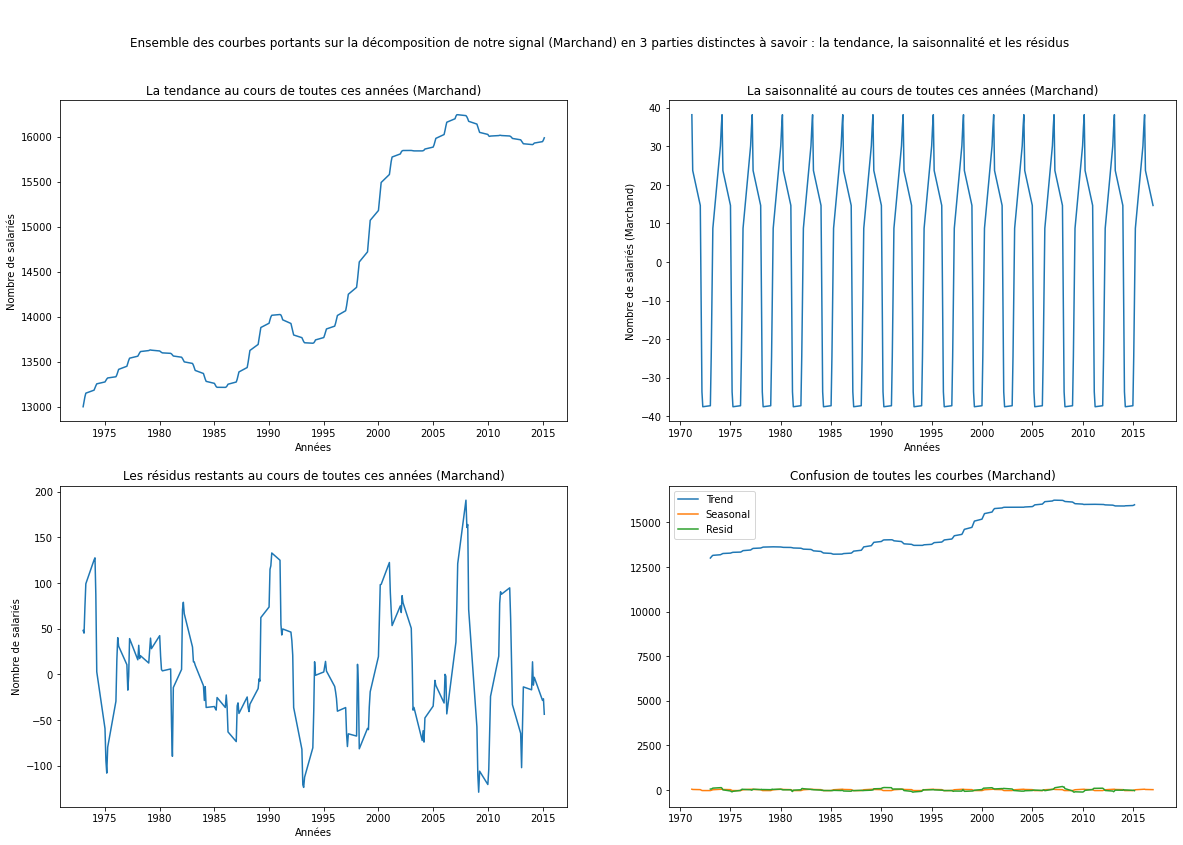

In [49]:
decomposition = seasonal_decompose(marchand, period = 12)

seasonal = decomposition.seasonal
trend = decomposition.trend
resid = decomposition.resid

plt.figure(1 , figsize =(16,12))
plt.plot(marchand.index, marchand, 'k')
plt.legend(['Nombre de salariés'])
plt.xlabel("Années")
plt.ylabel("Nombre de salariés")
plt.title("Evolution du nombre de salariés pour le secteur marchand au cours des années : signal original")

plt.figure(2 , figsize =(20,13))
plt.suptitle("\n\nEnsemble des courbes portants sur la décomposition de notre signal (Marchand) en 3 parties distinctes à savoir : la tendance, la saisonnalité et les résidus")

plt.subplot(2, 2, 1)
plt.plot(marchand.index,trend)
plt.xlabel("Années")
plt.ylabel("Nombre de salariés")
plt.title("La tendance au cours de toutes ces années (Marchand)")

plt.subplot(2, 2, 2)
plt.plot(marchand.index,seasonal)
plt.xlabel("Années")
plt.ylabel("Nombre de salariés (Marchand)")
plt.title("La saisonnalité au cours de toutes ces années (Marchand)")

plt.subplot(2, 2, 3)
plt.plot(marchand.index,resid) #ce qui reste après avoir éliminé les tendances et la saisonnalité
plt.xlabel("Années")
plt.ylabel("Nombre de salariés")
plt.title("Les résidus restants au cours de toutes ces années (Marchand)")

plt.subplot(2, 2, 4)
plt.plot(marchand.index,trend)
plt.plot(marchand.index,seasonal)
plt.plot(marchand.index,resid)
plt.title("Confusion de toutes les courbes (Marchand)")
plt.legend(['Trend', 'Seasonal', 'Resid'],loc='best')
plt.show()

**Le secteur principalement marchand n'a jamais vraiment connu de grosses décroissances. Depuis les années 70, ce secteur est en pleine expension même si depuis les années 2000 il semble tourner autour des 16 000 salariés. Il y a eu une forte augmentation à partir de l'année 1994, cela s'explique notamment par le début du E-commerce.** 

On enlève les jours fériés, les week-ends... On ne s'intéresse au nombre de salariés que sur les périodes de travail.

Text(0.5, 1.0, 'Evolution du nombre de salariés pour les marchands au fil des années')

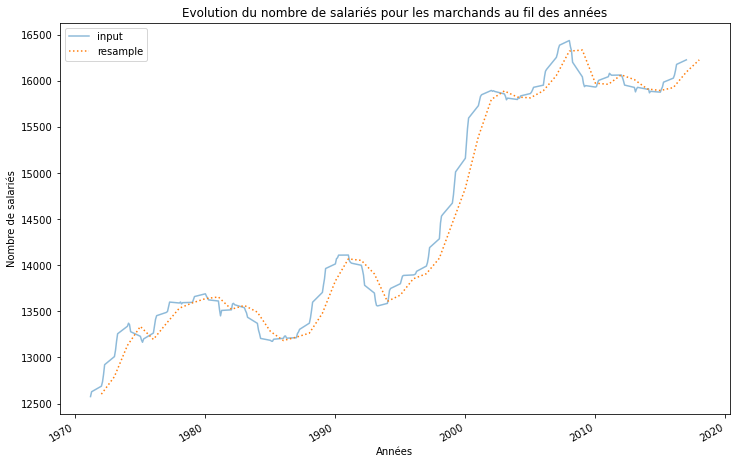

In [50]:
ax = marchand.plot(alpha=0.5, style='-')
marchand.resample('BA').mean().plot(style=':', ax = ax)
plt.legend(['input', 'resample'], loc='upper left')
plt.xlabel("Années")
plt.ylabel("Nombre de salariés")
plt.title("Evolution du nombre de salariés pour les marchands au fil des années")

#### 2.6.2. Pour le 2nd secteur : la Construction

In [51]:
construction = secteur2.iloc[:,2]

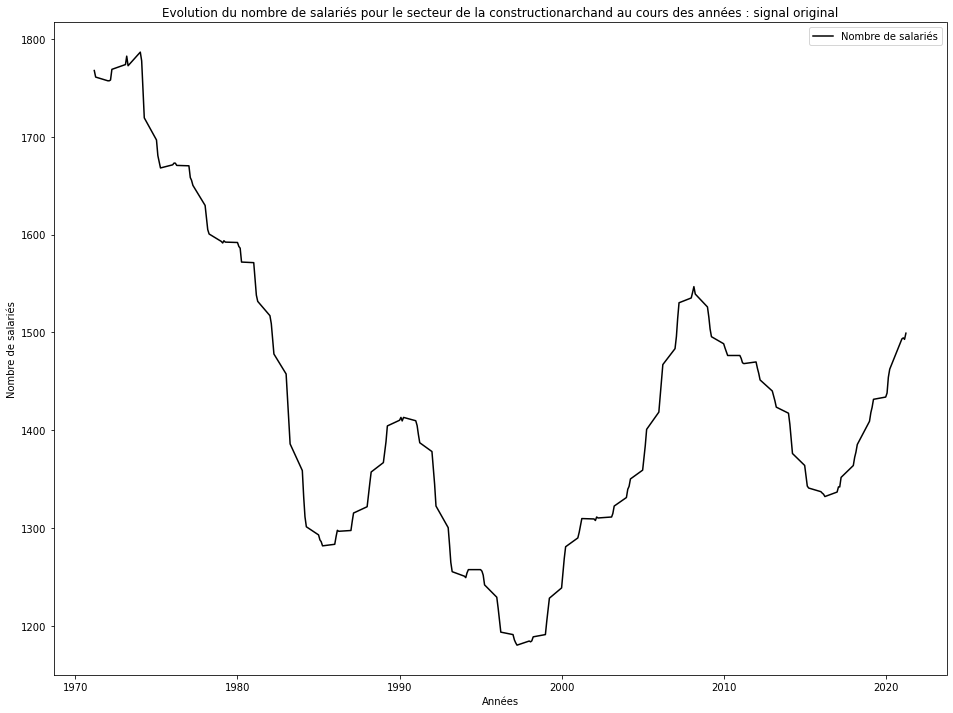

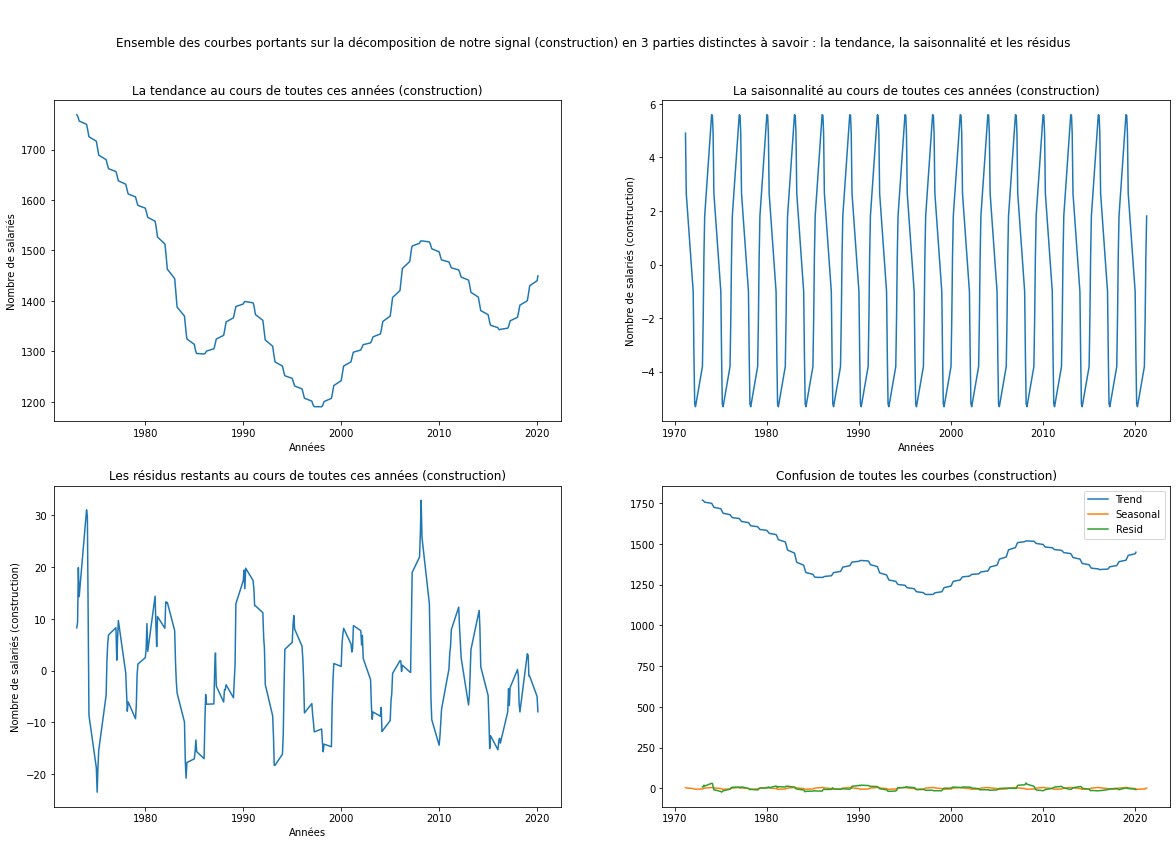

In [52]:
decomposition = seasonal_decompose(construction, period = 12)

seasonal = decomposition.seasonal
trend = decomposition.trend
resid = decomposition.resid

plt.figure(1 , figsize =(16,12))
plt.plot(construction.index, construction, 'k')
plt.legend(['Nombre de salariés'])
plt.xlabel("Années")
plt.ylabel("Nombre de salariés")
plt.title("Evolution du nombre de salariés pour le secteur de la constructionarchand au cours des années : signal original")

plt.figure(2 , figsize =(20,13))
plt.suptitle("\n\nEnsemble des courbes portants sur la décomposition de notre signal (construction) en 3 parties distinctes à savoir : la tendance, la saisonnalité et les résidus")

plt.subplot(2, 2, 1)
plt.plot(construction.index,trend)
plt.xlabel("Années")
plt.ylabel("Nombre de salariés")
plt.title("La tendance au cours de toutes ces années (construction)")

plt.subplot(2, 2, 2)
plt.plot(construction.index,seasonal)
plt.xlabel("Années")
plt.ylabel("Nombre de salariés (construction)")
plt.title("La saisonnalité au cours de toutes ces années (construction)")

plt.subplot(2, 2, 3)
plt.plot(construction.index,resid) #ce qui reste après avoir éliminé les tendances et la saisonnalité
plt.xlabel("Années")
plt.ylabel("Nombre de salariés (construction)")
plt.title("Les résidus restants au cours de toutes ces années (construction)")

plt.subplot(2, 2, 4)
plt.plot(construction.index,trend)
plt.plot(construction.index,seasonal)
plt.plot(construction.index,resid)
plt.title("Confusion de toutes les courbes (construction)")
plt.legend(['Trend', 'Seasonal', 'Resid'],loc='best')
plt.show()

**Contrairement au secteur principalement marchand, le domaine de la construction est beaucoup plus volatile. On remarque globalement une décroissance des années 70 jusqu'aux années 2000. On peut certainement expliquer le besoin de construire que ce soit des maisons ou des écoles par le Baby Boom. En parallèle il y a eu un allongement de l'espérance de vie de 6 ans ce qui implique la nécessité de construire de nouveaux logements. On peut aussi l'expliquer par le besoin de rénover les batiments qui commencent à être âgés.**

**Egalement, on peut potentiellement expliquer la décroissance suite aux années 70, car il y a eu des rénovations et des constructions suite à la Seconde Guerre mondiale et donc, après les annes 70, il n'y avait plus ce besoin de rebâtir le pays. Ou du moins, pas du point de vue des infrastructures.**

Text(0.5, 1.0, 'Evolution du nombre de salariés pour la construction au fil des années')

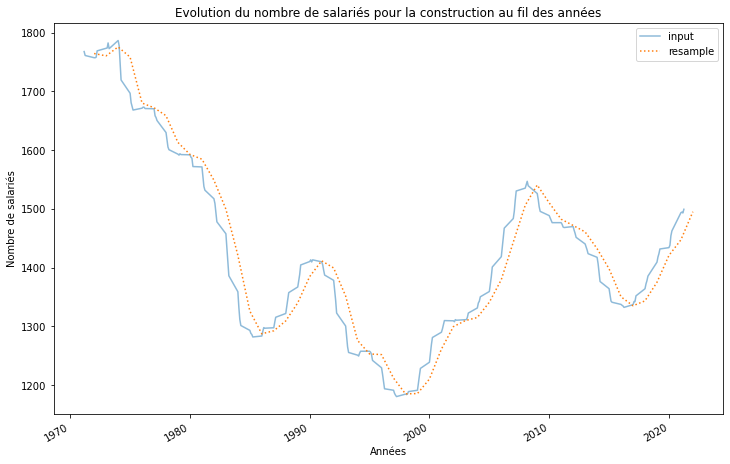

In [53]:
ax2 = construction.plot(alpha=0.5, style='-')
construction.resample('BA').mean().plot(style=':', ax = ax2)
plt.legend(['input', 'resample'], loc='best')
plt.xlabel("Années")
plt.ylabel("Nombre de salariés")
plt.title("Evolution du nombre de salariés pour la construction au fil des années")

### 2.7. Etude d'une possible corrélation entre les séries de DPAE et les séries sélectionnées d’EESSA

Dans cette étude nous avons fait attention à bien sélectionner la même période pour les deux bases de donées. De plus nous avons effectuée *interpolation ou un sous-échantillonnage du signal* une parce que les deux bases n’ont pas la même résolution temporelle.

#### On vient modifier nos datasets DPAE (CDD/CDI)
On vient rassembler les DPAE par trimestre par année et on somme l'ensemble

In [54]:
dpae_trimestre = df_CDD.groupby(by=['Annee','Trimestre']).sum()
dpae_trimestre.rename(columns ={'DPAE_brut':'DPAE_brut_CDD', 'DPAE_cvs':'DPAE_cvs_CDD'}, inplace= True)
dpae_cdi = df_CDI.groupby(by=['Annee','Trimestre']).sum()

#### On fait la même chose pour les deux secteurs de notre autre BDD

In [55]:
essa_trimestre_marchand = secteur1.groupby(by=['Annees','Trimestre']).sum()
essa_trimestre_construction = secteur2.groupby(by=['Annees','Trimestre']).sum()

#### On fusionne l'ensemble en un seul dataframe

In [56]:
resultat = dpae_trimestre.join(essa_trimestre_marchand,on=['Annee','Trimestre']) 
resultat = resultat.join(essa_trimestre_construction,on=['Annee','Trimestre'])
resultat = resultat.join(dpae_cdi,on=['Annee','Trimestre'])
resultat.drop(columns = 'DPAE_cvs_CDD', inplace = True)
resultat.drop(columns = 'DPAE_cvs', inplace = True)
resultat.rename(columns ={'DPAE_brut':'DPAE_brut_CDI'}, inplace= True)

#### On affiche les résultats pour essayer d'en déduire une corrélation

Text(0.5, 1.0, 'Emplois salariés trimestriels - Construction')

<Figure size 864x576 with 0 Axes>

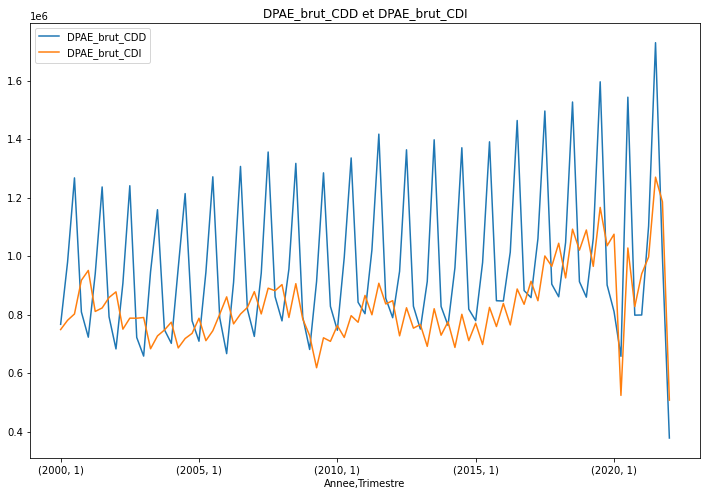

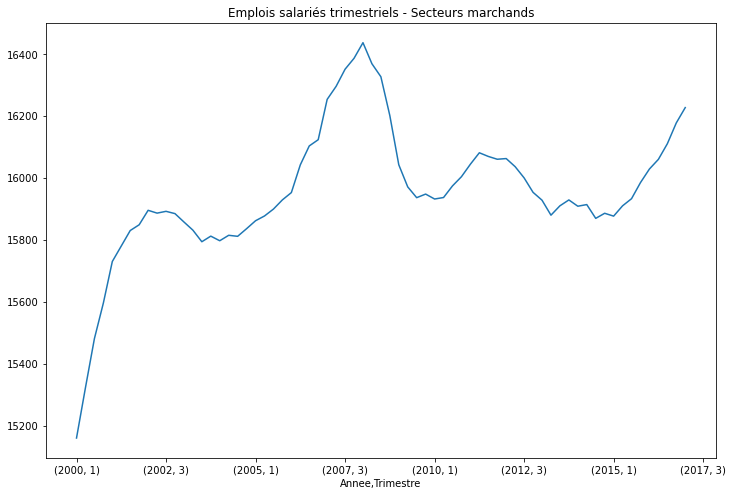

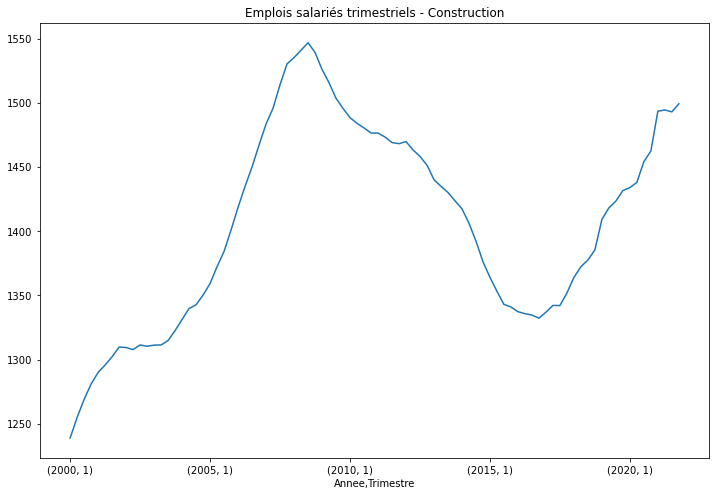

In [57]:
plt.figure()
resultat[['DPAE_brut_CDD','DPAE_brut_CDI']].plot()
plt.title('DPAE_brut_CDD et DPAE_brut_CDI')

plt.figure()
resultat['Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].plot()
plt.title('Emplois salariés trimestriels - Secteurs marchands')

plt.figure()
resultat['Emplois salariés trimestriels - Construction - A17 : FZ - CVS'].plot()
plt.title('Emplois salariés trimestriels - Construction')

**Observations**

Globalement, on remarque une tendance à la hausse pour l'ensemble des 4 courbes. Toutefois, on ne remarque pas de similarités particulières entre les courbes de DPAE et les courbes de EESSA. On peut donc naïvement en déduire qu'il n'y a pas de corrélation particulière entre nos séries de DPAE et nos séries de EESSA.
Cependant, on peut remarquer certaines corrélations entre les deux courbes de chaque série par exemple entre CDD/CDI ou entre marchand/construction puisque chaque courbe semble présenter les mêmes moments pour les croissances que pour les décroissances.

# 3. Question 3 : Prédiction par lissage exponentiel

### 3.1. Division de nos dataframes en deux : Train et Test

Afin de prédire et de comparer notre modèle avec différents modèles (cf. Q5), nous partitionnons nos dataframes afin d'avoir une zone "d'apprentissage" et une zone de test pour évaluer le modèle. Ici on s'intéresse au lissage exponentiel.

#### 3.1.1. Pour les CDD

On souhaite conserver l'ordre et ne pas avoir d'aléa donc plutôt que d'utiliser un train_test_split, on découpe manuellement nos données. On conserve 80% des données pour le train et 20% pour le test.

In [58]:
df_train_CDD = df_CDD.iloc[:int(df_CDD.shape[0]*0.8),:]
df_test_CDD = df_CDD.iloc[int(df_CDD.shape[0]*0.8):,:] 
print("Dimensions des nos dataframes pour l'entrainement et pour le test (CDD) :  entrainement = {} , test = {}".format(df_train_CDD.shape, df_test_CDD.shape))

Dimensions des nos dataframes pour l'entrainement et pour le test (CDD) :  entrainement = (212, 6) , test = (53, 6)


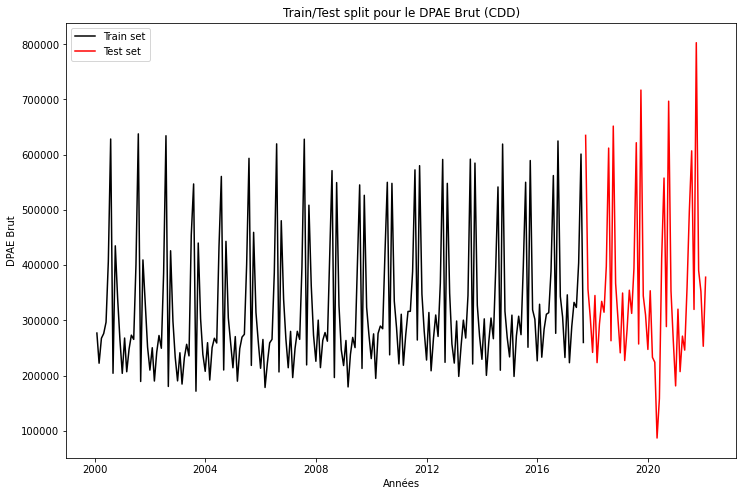

In [59]:
plt.figure(figsize = (12,8))
plt.plot(df_train_CDD["DPAE_brut"], color = "black", label = "Train set")
plt.plot(df_test_CDD["DPAE_brut"], color = "red", label = "Test set")
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Train/Test split pour le DPAE Brut (CDD)")
plt.legend(loc = "best")
plt.show()

#### 3.1.2. Pour les CDI

In [60]:
df_train_CDI = df_CDI.iloc[:int(df_CDI.shape[0]*0.8),:]
df_test_CDI = df_CDI.iloc[int(df_CDI.shape[0]*0.8):,:] 
print("Dimensions des nos dataframes pour l'entrainement et pour le test (CDI) :  entrainement = {} , test = {}".format(df_train_CDI.shape, df_test_CDI.shape))

Dimensions des nos dataframes pour l'entrainement et pour le test (CDI) :  entrainement = (212, 6) , test = (53, 6)


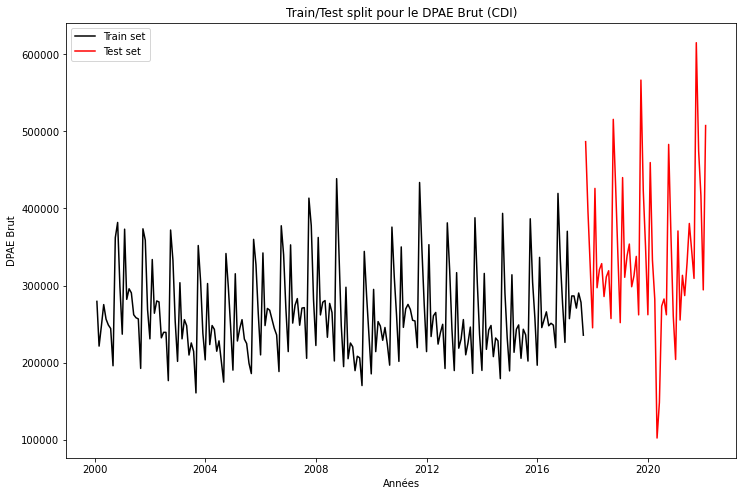

In [61]:
plt.figure(figsize = (12,8))
plt.plot(df_train_CDI["DPAE_brut"], color = "black", label = "Train set")
plt.plot(df_test_CDI["DPAE_brut"], color = "red", label = "Test set")
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Train/Test split pour le DPAE Brut (CDI)")
plt.legend(loc = "best")
plt.show()

### 3.2. Prédiction par lissage exponentielle simple (SES)

On convertit nos dataframes au bon format

In [62]:
df_train_CDI_ses = df_train_CDI["DPAE_brut"].values.tolist()
df_train_CDD_ses = df_train_CDD["DPAE_brut"].values.tolist()

On définit la méthode avec laquelle on veut traiter nos données

In [63]:
ses_CDI = SimpleExpSmoothing(df_train_CDI_ses,initialization_method = 'heuristic')
ses_CDD = SimpleExpSmoothing(df_train_CDD_ses,initialization_method = 'heuristic')

On implémente un modèle où l'on applique notre méthode avec un paramètre alpha que l'on vient préciser

In [64]:
alpha = 0.1
model_CDI = ses_CDI.fit(smoothing_level = alpha, optimized = False)
model_CDD = ses_CDD.fit(smoothing_level = alpha, optimized = False)

On prédit les valeurs sur tous les mois correspondant à notre partie test afin de comparer ultérieurement

In [65]:
forecast_values_CDI_ses = model_CDI.forecast(df_test_CDI.shape[0]) #We will predict the next 53 months
forecast_values_CDD_ses = model_CDD.forecast(df_test_CDD.shape[0]) #We will predict the next 53 months 

**Si l'on souhaite directement accéder au paramètre alpha optimal, on peut procéder ainsi :**

In [66]:
#ses_CDI = SimpleExpSmoothing(df_train_CDI_ses, initialization_method="estimated").fit()
#ses_CDI.params_formatted

#ses_CDD = SimpleExpSmoothing(df_train_CDD_ses, initialization_method="estimated").fit()
#ses_CDD.params_formatted

#### 3.2.1. Pour les CDD

Maintenant on passe à la visualisation de notre signal original et du signal prédit :

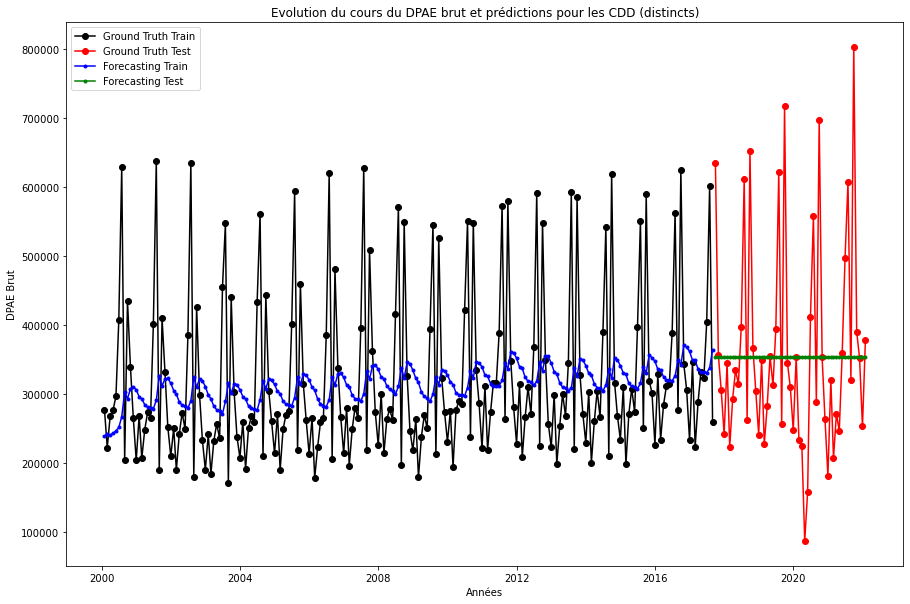

In [67]:
plt.figure(figsize = (15,10))
plt.plot(df_train_CDD.index,df_train_CDD_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(df_test_CDD.index, df_test_CDD["DPAE_brut"], marker="o", color = "red", label = 'Ground Truth Test')
plt.plot(df_train_CDD.index,model_CDD.fittedvalues, marker=".", color="blue", label='Forecasting Train')
plt.plot(df_test_CDD.index,forecast_values_CDD_ses, marker=".", color = "green", label = 'Forecasting Test')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions pour les CDD (distincts)")
plt.legend(loc='best')
plt.show()

Pour mieux visualiser, on ne s'intéresse plus au train/test et on ne cherche plus qu'à dinstinguer visuellement les prédictions de la réalité 

In [68]:
full_curve_CDD = np.concatenate((model_CDD.fittedvalues, forecast_values_CDD_ses))

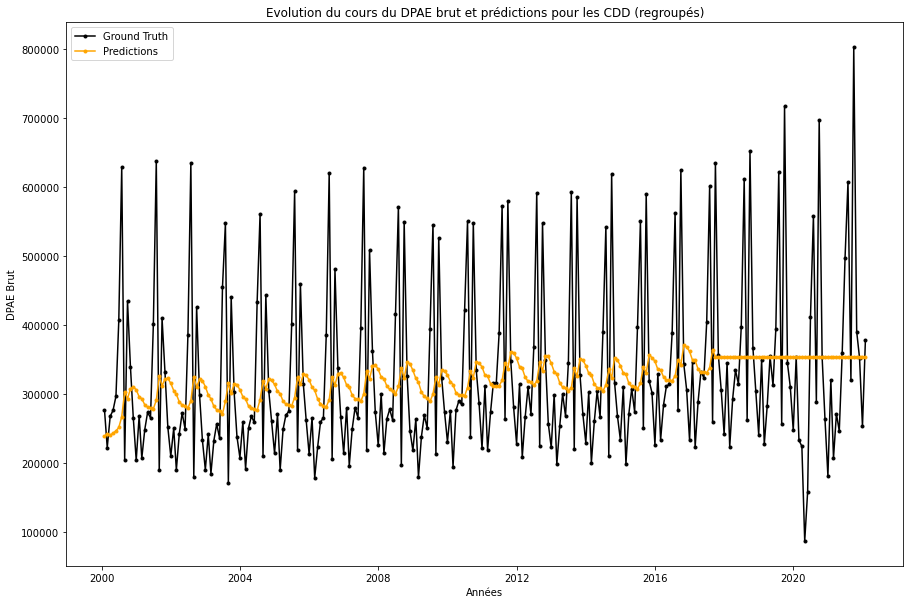

In [69]:
plt.figure(figsize = (15,10))
plt.plot(df_CDD.index, df_CDD['DPAE_brut'], marker=".", color = "black", label = 'Ground Truth')
plt.plot(df_CDD.index, full_curve_CDD, marker=".", color = "orange", label = 'Predictions')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions pour les CDD (regroupés)")
plt.legend(loc='best')
plt.show()

#### 3.2.2. Pour les CDI

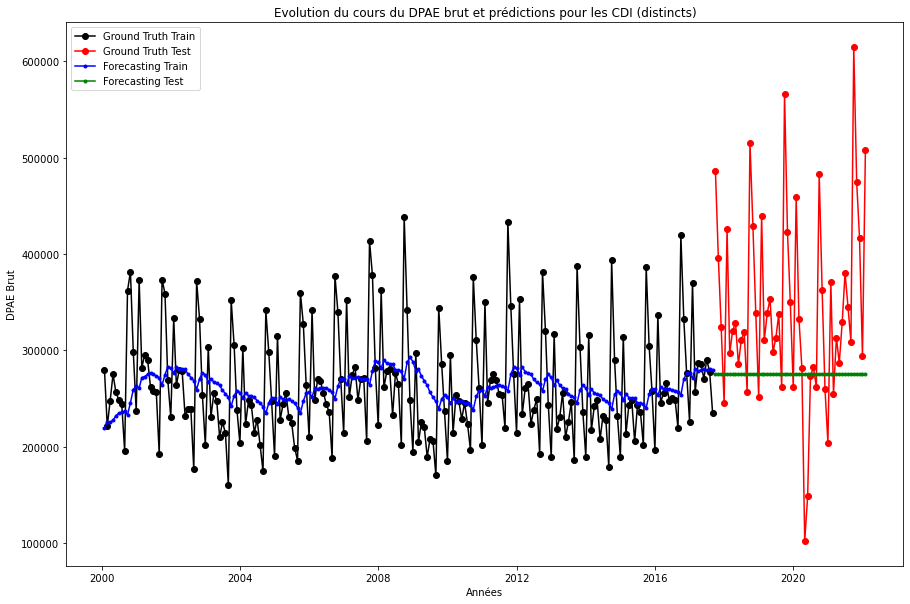

In [70]:
plt.figure(figsize = (15,10))
plt.plot(df_train_CDI.index,df_train_CDI_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(df_test_CDI.index, df_test_CDI["DPAE_brut"], marker="o", color = "red", label = 'Ground Truth Test')
plt.plot(df_train_CDI.index,model_CDI.fittedvalues, marker=".", color="blue", label='Forecasting Train')
plt.plot(df_test_CDI.index,forecast_values_CDI_ses, marker=".", color = "green", label = 'Forecasting Test')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions pour les CDI (distincts)")
plt.legend(loc='best')
plt.show()

In [71]:
full_curve_CDI = np.concatenate((model_CDI.fittedvalues, forecast_values_CDI_ses))

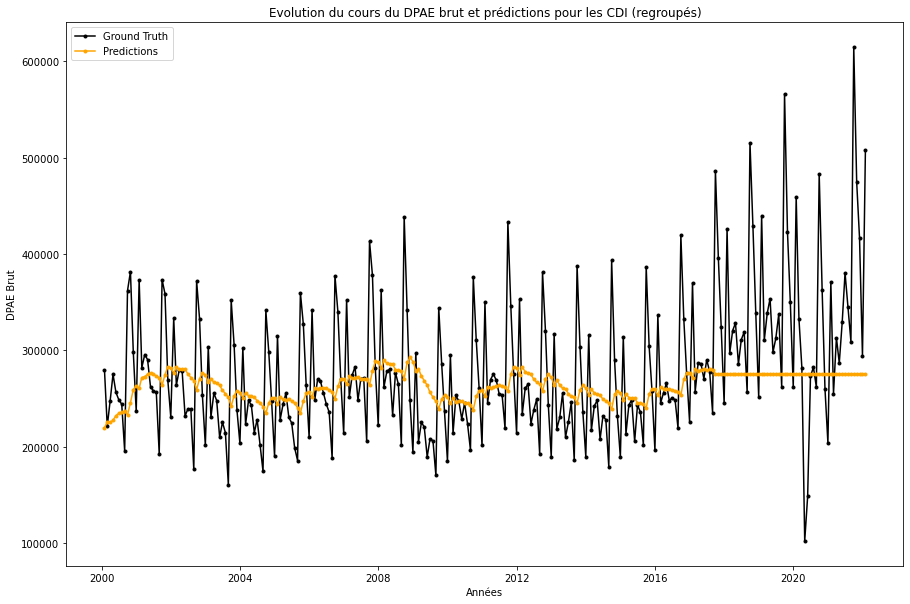

In [72]:
plt.figure(figsize = (15,10))
plt.plot(df_CDI.index, df_CDI['DPAE_brut'], marker=".", color = "black", label = 'Ground Truth')
plt.plot(df_CDI.index, full_curve_CDI, marker=".", color = "orange", label = 'Predictions')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions pour les CDI (regroupés)")
plt.legend(loc='best')
plt.show()

### 3.3. Nouvelle division pour les dataframes concernant la BDD : EESSA

On vient à nouveau définir le pourcentage qui va indiquer la quantité de données conservée pour "l'apprentissage" (80%) et pour le test (20%).

In [73]:
train_ratio = 0.8 
test_ratio = 1 - train_ratio

marchand = secteur1
construction = secteur2

#### 3.3.1. Pour le 1er secteur (marchand)

In [74]:
train_index_max = int(np.floor(train_ratio * len(marchand)))

train_set_marchand = marchand.iloc[0:train_index_max]
test_set_marchand = marchand.iloc[train_index_max:]

print("Taille totale du dataframe marchand : "+str(len(marchand)))
print("Taille du dataframe d'entrainement pour les marchands : "+str(len(train_set_marchand)))
print("Taille du dataframe de test pour les marchands : "+str(len(test_set_marchand)))

Taille totale du dataframe marchand : 183
Taille du dataframe d'entrainement pour les marchands : 146
Taille du dataframe de test pour les marchands : 37


#### 3.3.2. Pour le 2nd secteur (construction)

In [75]:
train_index_max = int(np.floor(train_ratio * len(construction)))

train_set_construction = construction.iloc[0:train_index_max]
test_set_construction = construction.iloc[train_index_max:]

print("Taille totale du dataframe marchand : "+str(len(construction)))
print("Taille du dataframe d'entrainement pour les marchands : "+str(len(train_set_construction)))
print("Taille du dataframe de test pour les marchands : "+str(len(test_set_construction)))

Taille totale du dataframe marchand : 202
Taille du dataframe d'entrainement pour les marchands : 161
Taille du dataframe de test pour les marchands : 41


### 3.4. Prédiction par SES

In [76]:
df_train_marchand_ses = train_set_marchand.iloc[:,2].values 
df_train_construction_ses = train_set_construction.iloc[:,2].values 

df_test_marchand_ses = test_set_marchand.iloc[:,2].values 
df_test_construction_ses = test_set_construction.iloc[:,2].values 

In [77]:
ses_marchand = SimpleExpSmoothing(df_train_marchand_ses,initialization_method = 'heuristic')
ses_construction = SimpleExpSmoothing(df_train_construction_ses,initialization_method = 'heuristic')

In [78]:
alpha = 0.1
model_marchand = ses_marchand.fit(smoothing_level = alpha, optimized = False)
model_construction = ses_construction.fit(smoothing_level = alpha, optimized = False)

In [79]:
forecast_values_marchand_ses = model_marchand.forecast(df_test_marchand_ses.shape[0]) 
forecast_values_construction_ses = model_construction.forecast(df_test_construction_ses.shape[0]) 

**Si l'on souhaite directement accéder au paramètre alpha optimal, on peut procéder ainsi :**

In [80]:
#ses_marchand = SimpleExpSmoothing(data_train_marchand, initialization_method="estimated").fit()
#ses_marchand.params_formatted

#ses_construction = SimpleExpSmoothing(data_train_construction, initialization_method="estimated").fit()
#ses_construction.params_formatted

#### 3.4.1. Pour le 1er secteur : les marchands 

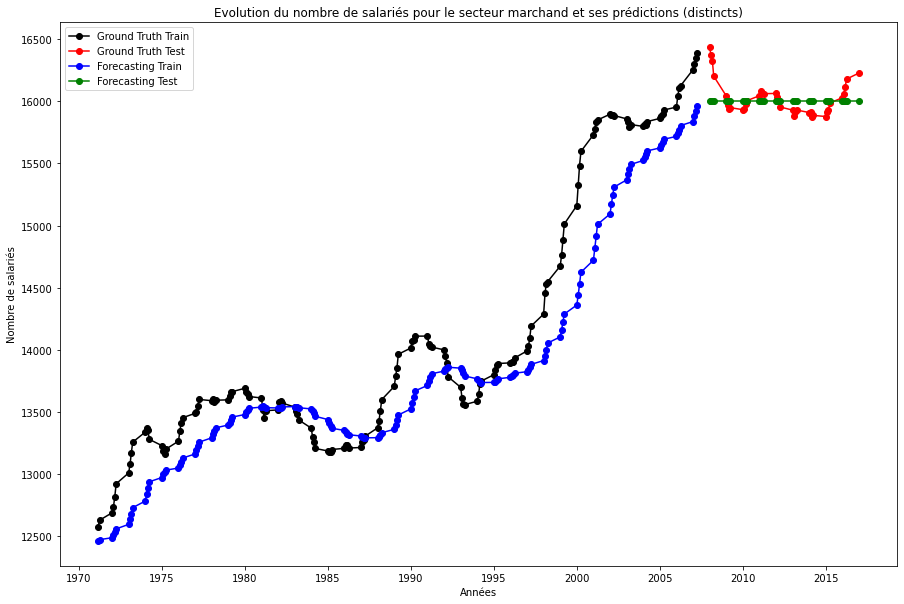

In [81]:
plt.figure(figsize = (15,10))
plt.plot(train_set_marchand.index, df_train_marchand_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(test_set_marchand.index, df_test_marchand_ses, marker="o", color="red", label='Ground Truth Test')
plt.plot(train_set_marchand.index, model_marchand.fittedvalues, marker="o", color="blue", label='Forecasting Train')
plt.plot(test_set_marchand.index, forecast_values_marchand_ses, marker="o", color="green", label='Forecasting Test')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés pour le secteur marchand et ses prédictions (distincts)")
plt.legend(loc='best')
plt.show()

In [82]:
full_curve_marchand = np.concatenate((model_marchand.fittedvalues, forecast_values_marchand_ses))

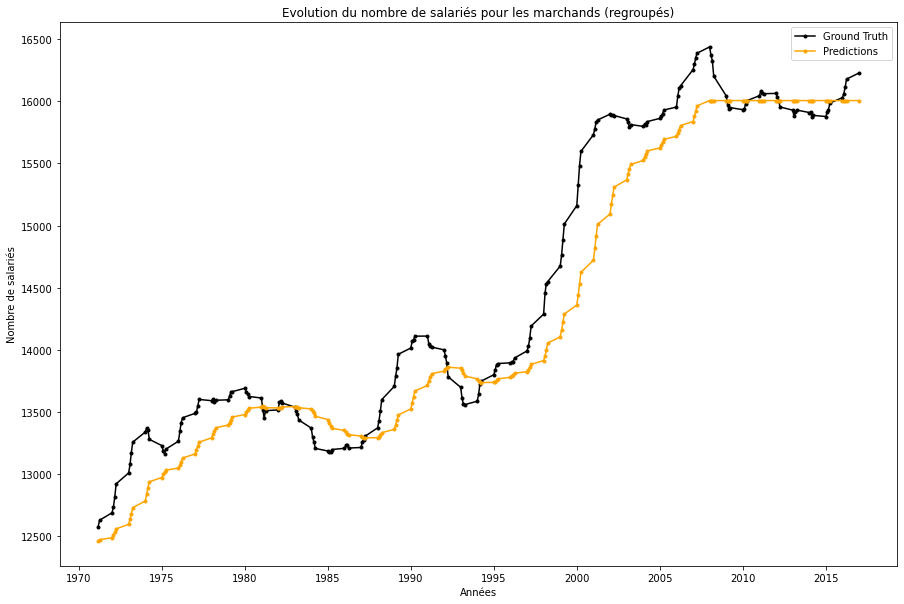

In [83]:
plt.figure(figsize = (15,10))
plt.plot(marchand.index, secteur1['Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].values, marker=".", color = "black", label = 'Ground Truth')
plt.plot(marchand.index, full_curve_marchand, marker=".", color = "orange", label = 'Predictions')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés pour les marchands (regroupés)")
plt.legend(loc='best')
plt.show()

#### 3.4.2. Pour le 2nd secteur : La construction

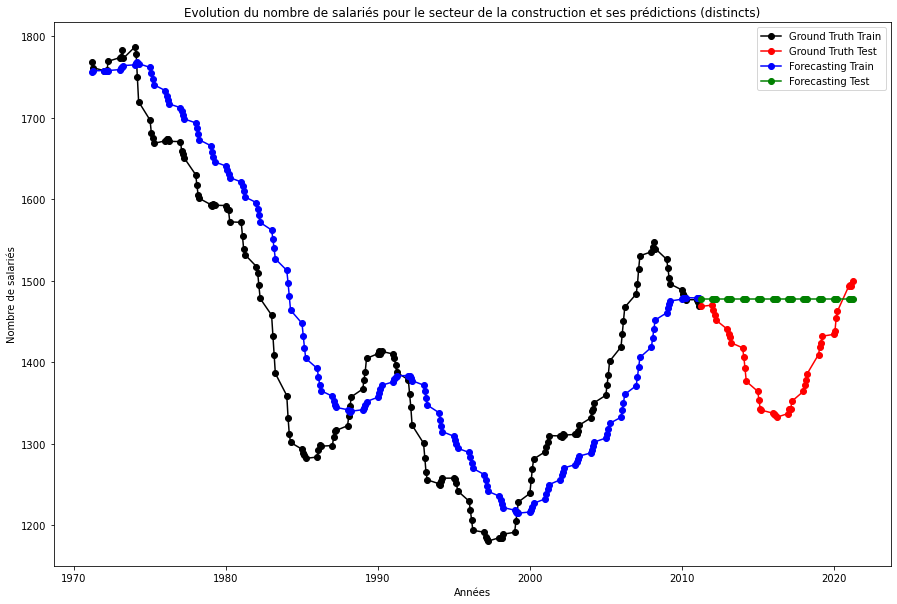

In [84]:
plt.figure(figsize = (15,10))
plt.plot(train_set_construction.index, df_train_construction_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(test_set_construction.index, df_test_construction_ses, marker="o", color="red", label='Ground Truth Test')
plt.plot(train_set_construction.index, model_construction.fittedvalues, marker="o", color="blue", label='Forecasting Train')
plt.plot(test_set_construction.index, forecast_values_construction_ses, marker="o", color="green", label='Forecasting Test')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés pour le secteur de la construction et ses prédictions (distincts)")
plt.legend(loc='best')
plt.show()

In [85]:
full_curve_construction = np.concatenate((model_construction.fittedvalues, forecast_values_construction_ses))

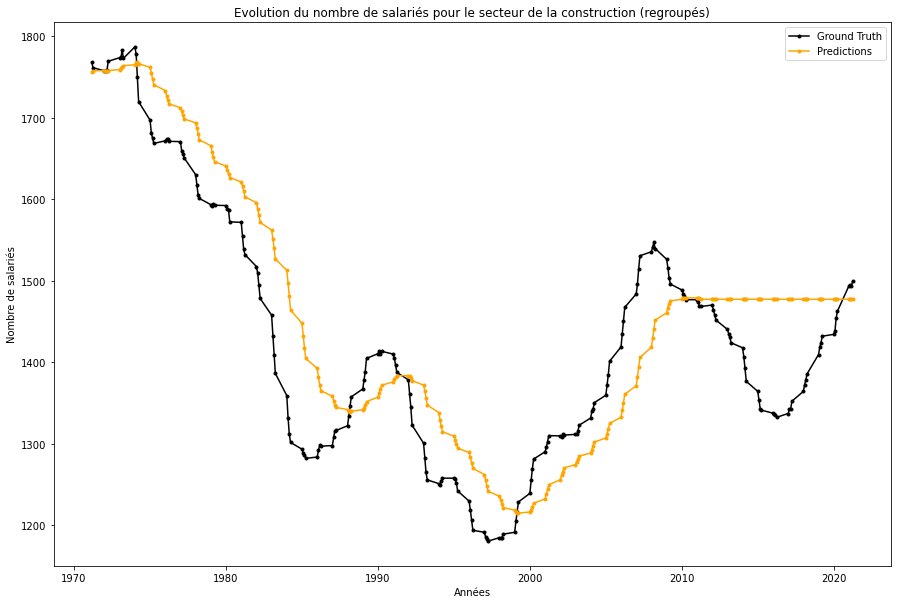

In [86]:
plt.figure(figsize = (15,10))
plt.plot(construction.index, secteur2['Emplois salariés trimestriels - Construction - A17 : FZ - CVS'].values, marker=".", color = "black", label = 'Ground Truth')
plt.plot(construction.index, full_curve_construction, marker=".", color = "orange", label = 'Predictions')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés pour le secteur de la construction (regroupés)")
plt.legend(loc='best')
plt.show()

# 4. Question 4 : Evaluation de la prédiction de notre modèle

#### Pour évaluer la prédiction faite par notre modèle, on va venir s'intéresser uniquement à la partie "test" de nos dataframes. On utilise la RMSE comme métrique.

In [87]:
rmse_ses_CDD = np.sqrt(mean_squared_error(df_test_CDD["DPAE_brut"], forecast_values_CDD_ses))
print("RMSE ses pour les CDD : ",rmse_ses_CDD)

rmse_ses_CDI = np.sqrt(mean_squared_error(df_test_CDI["DPAE_brut"], forecast_values_CDI_ses))
print("RMSE ses pour les CDI: ",rmse_ses_CDI)

RMSE ses pour les CDD :  152613.75530364187
RMSE ses pour les CDI:  117741.89578768644


In [88]:
rmse_ses_marchand = np.sqrt(mean_squared_error(df_test_marchand_ses,forecast_values_marchand_ses))
print("RMSE ses pour les marchands:",rmse_ses_marchand)

rmse_ses_construction = np.sqrt(mean_squared_error(df_test_construction_ses,forecast_values_construction_ses))
print("RMSE ses pour la construction:",rmse_ses_construction)

RMSE ses pour les marchands: 139.034526405764
RMSE ses pour la construction: 87.37792266144972


# 5. Question 5 : Application et évaluation d’autres modèles de prédiction

### 5.1. 1er modèle : Holt Winter's Seasonal Model

#### 5.1.1. Pour la première BDD : DPAE

In [89]:
holt_CDD = ExponentialSmoothing(df_train_CDD_ses, seasonal_periods = 12, trend = "add", seasonal = "add", use_boxcox = False, initialization_method = "heuristic") 
model_holt_CDD = holt_CDD.fit()

holt_CDI = ExponentialSmoothing(df_train_CDI_ses, seasonal_periods = 12, trend = "add", seasonal = "add", use_boxcox = False, initialization_method = "heuristic") 
model_holt_CDI = holt_CDI.fit()

C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


- seasonal_periods: the number of periods in a complete seasonal cycle, e.g., 4 for quarterly data or 7 for daily data with a weekly cycle
- trend : type of trend component (here "add" means "additive")
- seasonal : type of seasonal component (here "add" means "additive")
- use_boxcox: if true, a Box-Cox transform is applied to the data first
- initialization_method: method for initialize the recursions

In [90]:
forecast_values_CDD_holt = model_holt_CDD.forecast(df_test_CDD.shape[0])
forecast_values_CDI_holt = model_holt_CDI.forecast(df_test_CDI.shape[0])

full_curve_CDD = np.concatenate((model_holt_CDD.fittedvalues, forecast_values_CDD_holt))
full_curve_CDI = np.concatenate((model_holt_CDI.fittedvalues, forecast_values_CDI_holt))

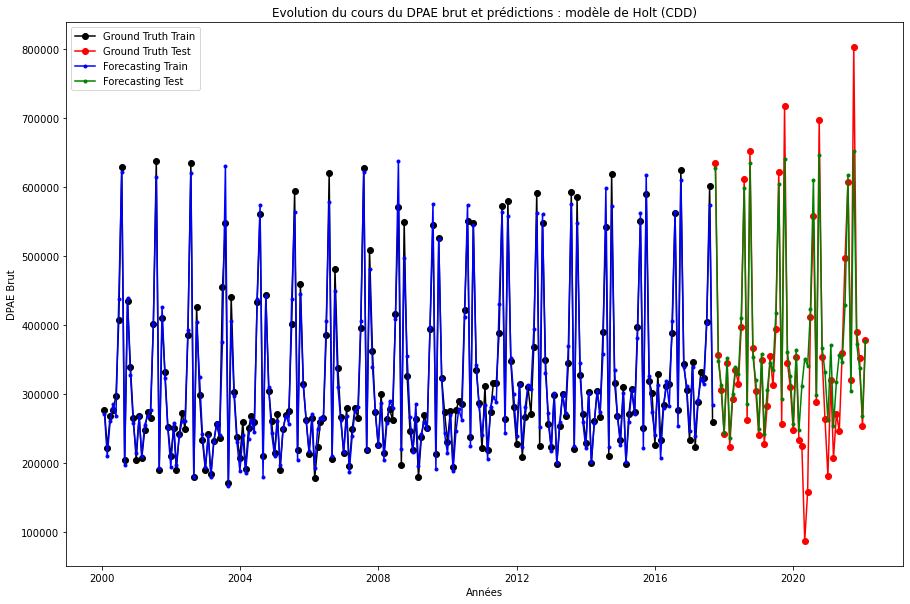

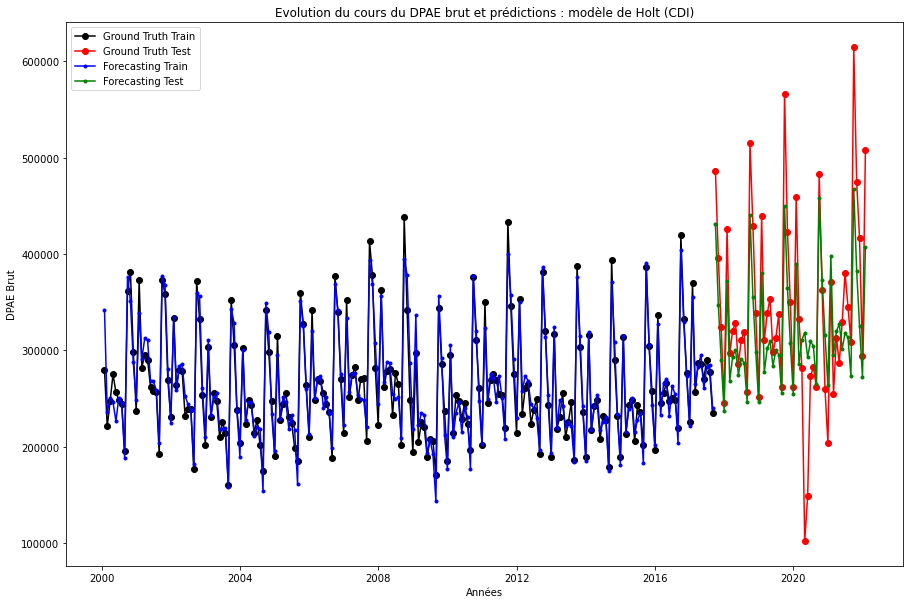

In [91]:
plt.figure(figsize = (15,10))
plt.plot(df_train_CDD.index,df_train_CDD_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(df_test_CDD.index, df_test_CDD["DPAE_brut"], marker="o", color = "red", label = 'Ground Truth Test')
plt.plot(df_train_CDD.index,model_holt_CDD.fittedvalues, marker=".", color="blue", label='Forecasting Train')
plt.plot(df_test_CDD.index,forecast_values_CDD_holt, marker=".", color = "green", label = 'Forecasting Test')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions : modèle de Holt (CDD)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (15,10))
plt.plot(df_train_CDI.index,df_train_CDI_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(df_test_CDI.index, df_test_CDI["DPAE_brut"], marker="o", color = "red", label = 'Ground Truth Test')
plt.plot(df_train_CDI.index,model_holt_CDI.fittedvalues, marker=".", color="blue", label='Forecasting Train')
plt.plot(df_test_CDI.index,forecast_values_CDI_holt, marker=".", color = "green", label = 'Forecasting Test')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions : modèle de Holt (CDI)")
plt.legend(loc='best')
plt.show()

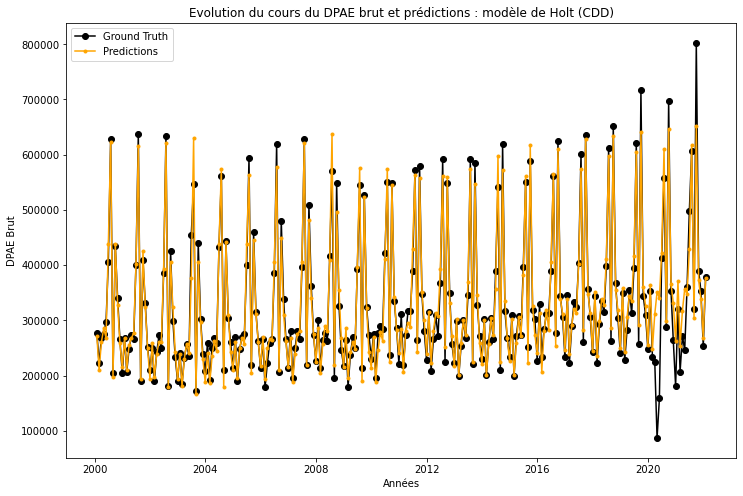

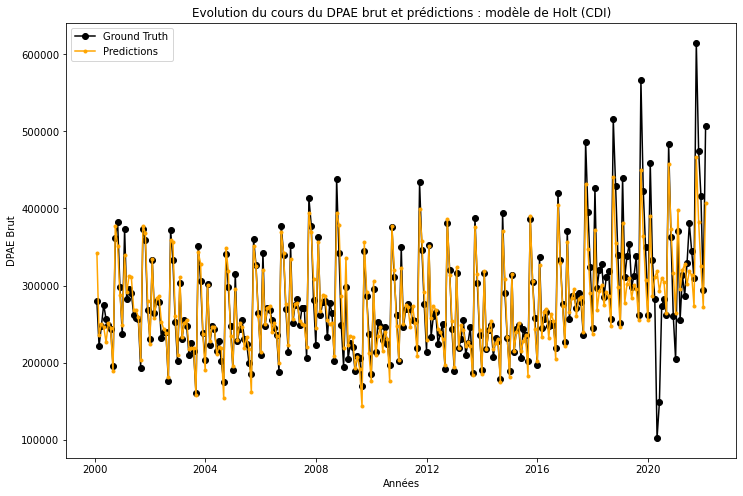

In [92]:
plt.figure(figsize = (12,8))
plt.plot(df_CDD.index, df_CDD['DPAE_brut'], marker="o", color="black", label='Ground Truth')
plt.plot(df_CDD.index,full_curve_CDD, marker=".", color="orange", label='Predictions')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions : modèle de Holt (CDD)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (12,8))
plt.plot(df_CDI.index, df_CDI['DPAE_brut'], marker="o", color="black", label='Ground Truth')
plt.plot(df_CDI.index,full_curve_CDI, marker=".", color="orange", label='Predictions')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions : modèle de Holt (CDI)")
plt.legend(loc='best')
plt.show()

In [93]:
rmse_holt_CDD = np.sqrt(mean_squared_error(df_test_CDD["DPAE_brut"], forecast_values_CDD_holt))
print("RMSE CDD pour Holt: ", rmse_holt_CDD)

rmse_holt_CDI = np.sqrt(mean_squared_error(df_test_CDI["DPAE_brut"], forecast_values_CDI_holt))
print("RMSE CDI pour Holt: ", rmse_holt_CDI)

RMSE CDD pour Holt:  59527.64552672389
RMSE CDI pour Holt:  61481.82893708807


#### Nous n'avons pas de saisonnalité pour les secteurs, donc nous n'utilisons pas ce même modèle

### 5.2. 2ème modèle : ARIMA (autoregressive integrated moving average)

#### 5.2.1. Pour la première BDD : DPAE

A l'aide des courbes d'autocorrélation (plot_pacf), on essaye d'en déduire des paramètres "optimaux" afin de remplir les orders de nos modèle ARIMA et SARIMAX.

In [94]:
arima_CDD = ARIMA(df_train_CDD_ses, order = (12, 1, 9)) #(poids du passé, nb itération, poids du futur)
model_arima_CDD = arima_CDD.fit()

arima_CDI = ARIMA(df_train_CDI_ses, order = (12, 1, 9))
model_arima_CDI = arima_CDI.fit()

C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [95]:
forecast_values_CDD_arima = model_arima_CDD.get_forecast(len(df_test_CDD["DPAE_brut"].index))
forecast_values_CDD_arima_df = forecast_values_CDD_arima.conf_int(alpha = 0.05)

forecast_values_CDI_arima = model_arima_CDI.get_forecast(len(df_test_CDI["DPAE_brut"].index))
forecast_values_CDI_arima_df = forecast_values_CDI_arima.conf_int(alpha = 0.05)

In [96]:
forecast_values_CDD_arima_df = pd.DataFrame(forecast_values_CDD_arima_df)
forecast_values_CDI_arima_df = pd.DataFrame(forecast_values_CDI_arima_df)

In [97]:
forecast_values_CDD_arima_df["Predictions"] = model_arima_CDD.predict(start = forecast_values_CDD_arima_df.index[0], end = forecast_values_CDD_arima_df.index[-1])
forecast_values_CDD_arima_df.index = df_test_CDD["DPAE_brut"].index
predictions_CDD_arima = forecast_values_CDD_arima_df["Predictions"] 

forecast_values_CDI_arima_df["Predictions"] = model_arima_CDI.predict(start = forecast_values_CDI_arima_df.index[0], end = forecast_values_CDI_arima_df.index[-1])
forecast_values_CDI_arima_df.index = df_test_CDI["DPAE_brut"].index
predictions_CDI_arima = forecast_values_CDI_arima_df["Predictions"] 

full_curve_CDD_arima = np.concatenate((model_arima_CDD.fittedvalues, forecast_values_CDD_arima_df["Predictions"]))
full_curve_CDI_arima = np.concatenate((model_arima_CDI.fittedvalues, forecast_values_CDI_arima_df["Predictions"]))

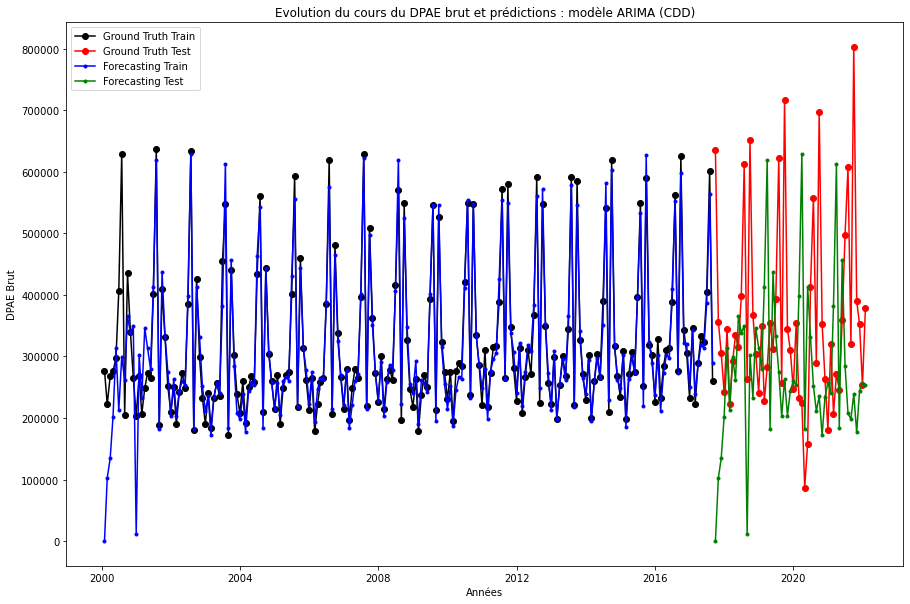

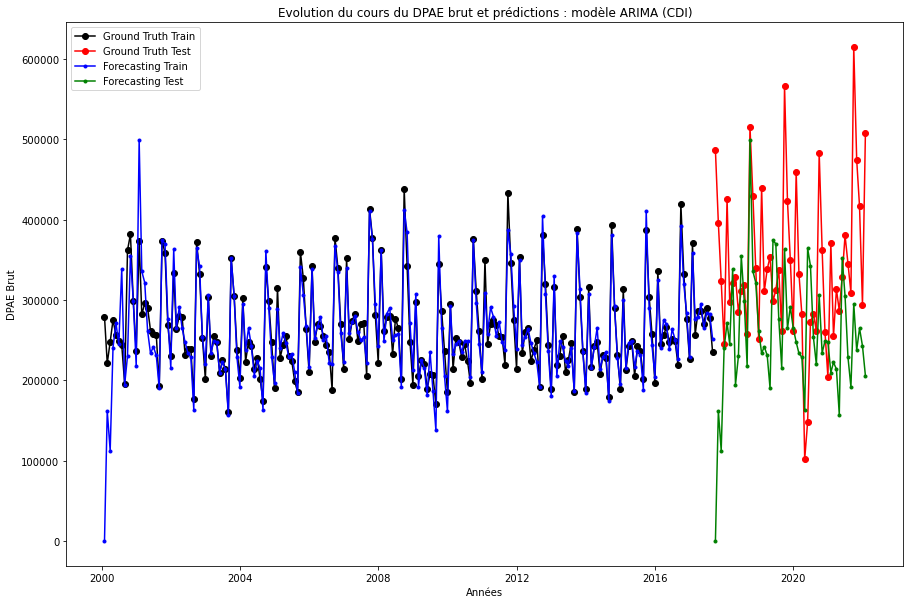

In [98]:
plt.figure(figsize = (15,10))
plt.plot(df_train_CDD.index,df_train_CDD_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(df_test_CDD.index, df_test_CDD["DPAE_brut"], marker="o", color = "red", label = 'Ground Truth Test')
plt.plot(df_train_CDD.index,model_arima_CDD.fittedvalues, marker=".", color="blue", label='Forecasting Train')
plt.plot(df_test_CDD.index,predictions_CDD_arima, marker=".", color = "green", label = 'Forecasting Test')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions : modèle ARIMA (CDD)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (15,10))
plt.plot(df_train_CDI.index,df_train_CDI_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(df_test_CDI.index, df_test_CDI["DPAE_brut"], marker="o", color = "red", label = 'Ground Truth Test')
plt.plot(df_train_CDI.index,model_arima_CDI.fittedvalues, marker=".", color="blue", label='Forecasting Train')
plt.plot(df_test_CDI.index,predictions_CDI_arima, marker=".", color = "green", label = 'Forecasting Test')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions : modèle ARIMA (CDI)")
plt.legend(loc='best')
plt.show()

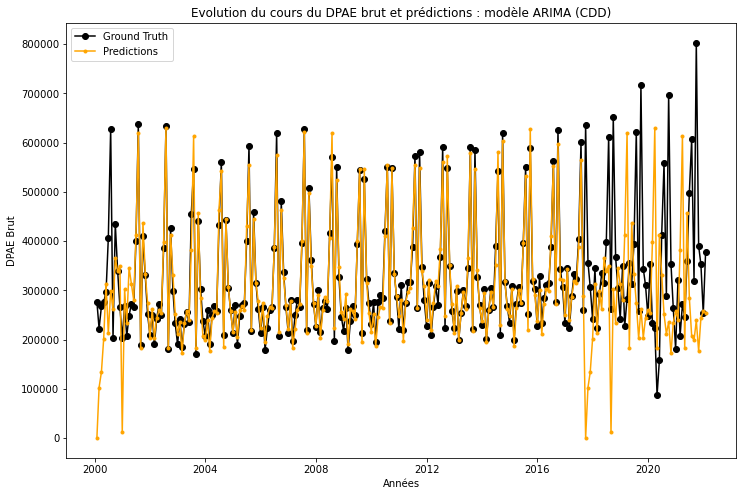

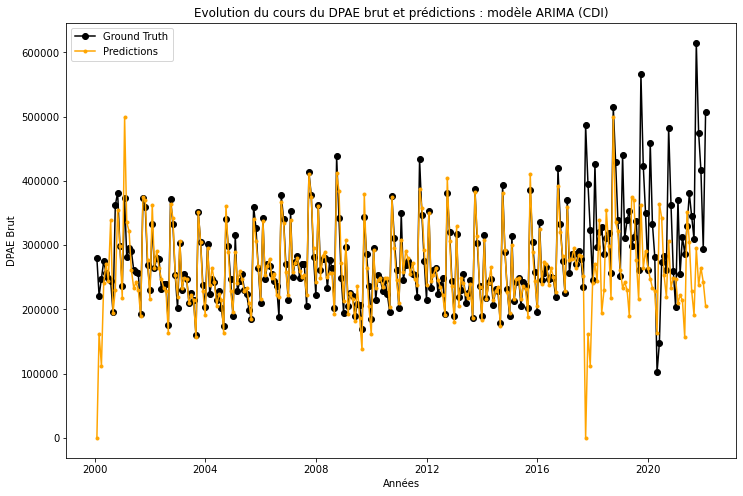

In [99]:
plt.figure(figsize = (12,8))
plt.plot(df_CDD.index, df_CDD['DPAE_brut'], marker="o", color="black", label='Ground Truth')
plt.plot(df_CDD.index,full_curve_CDD_arima, marker=".", color="orange", label='Predictions')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions : modèle ARIMA (CDD)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (12,8))
plt.plot(df_CDI.index, df_CDI['DPAE_brut'], marker="o", color="black", label='Ground Truth')
plt.plot(df_CDI.index, full_curve_CDI_arima, marker=".", color="orange", label='Predictions')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions : modèle ARIMA (CDI)")
plt.legend(loc='best')
plt.show()

In [100]:
rmse_arima_CDD = np.sqrt(mean_squared_error(df_test_CDD["DPAE_brut"], predictions_CDD_arima))
print("RMSE CDD pour ARIMA: ", rmse_arima_CDD)

rmse_arima_CDI = np.sqrt(mean_squared_error(df_test_CDI["DPAE_brut"], predictions_CDI_arima))
print("RMSE CDI pour ARIMA: ", rmse_arima_CDI)

RMSE CDD pour ARIMA:  227976.0664440867
RMSE CDI pour ARIMA:  143762.8895417831


#### 5.2.2. Pour la seconde BDD : EESSA

In [101]:
arima_marchand = ARIMA(df_train_marchand_ses, order = (1, 0, 1)) #(poids du passé, nb itération, poids du futur)
model_arima_marchand = arima_marchand.fit()

arima_construction = ARIMA(df_train_construction_ses, order = (1, 0, 1))
model_arima_construction = arima_construction.fit()

C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [102]:
forecast_values_marchand_arima = model_arima_marchand.get_forecast(df_test_marchand_ses.shape[0])
forecast_values_marchand_arima_df = forecast_values_marchand_arima.conf_int(alpha = 0.05)

forecast_values_construction_arima = model_arima_construction.get_forecast(df_test_construction_ses.shape[0])
forecast_values_construction_arima_df = forecast_values_construction_arima.conf_int(alpha = 0.05)

In [103]:
forecast_values_marchand_arima_df = pd.DataFrame(forecast_values_marchand_arima_df)
forecast_values_construction_arima_df = pd.DataFrame(forecast_values_construction_arima_df)

In [104]:
forecast_values_marchand_arima_df["Predictions"] = model_arima_marchand.predict(start = forecast_values_marchand_arima_df.index[0], end = forecast_values_marchand_arima_df.index[-1])
forecast_values_marchand_arima_df.index = test_set_marchand['Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].index
predictions_marchand_arima = forecast_values_marchand_arima_df["Predictions"] 

forecast_values_construction_arima_df["Predictions"] = model_arima_construction.predict(start = forecast_values_construction_arima_df.index[0], end = forecast_values_construction_arima_df.index[-1])
forecast_values_construction_arima_df.index = test_set_construction['Emplois salariés trimestriels - Construction - A17 : FZ - CVS'].index
predictions_construction_arima = forecast_values_construction_arima_df["Predictions"] 

full_curve_marchand_arima = np.concatenate((model_arima_marchand.fittedvalues, forecast_values_marchand_arima_df["Predictions"]))
full_curve_construction_arima = np.concatenate((model_arima_construction.fittedvalues, forecast_values_construction_arima_df["Predictions"]))

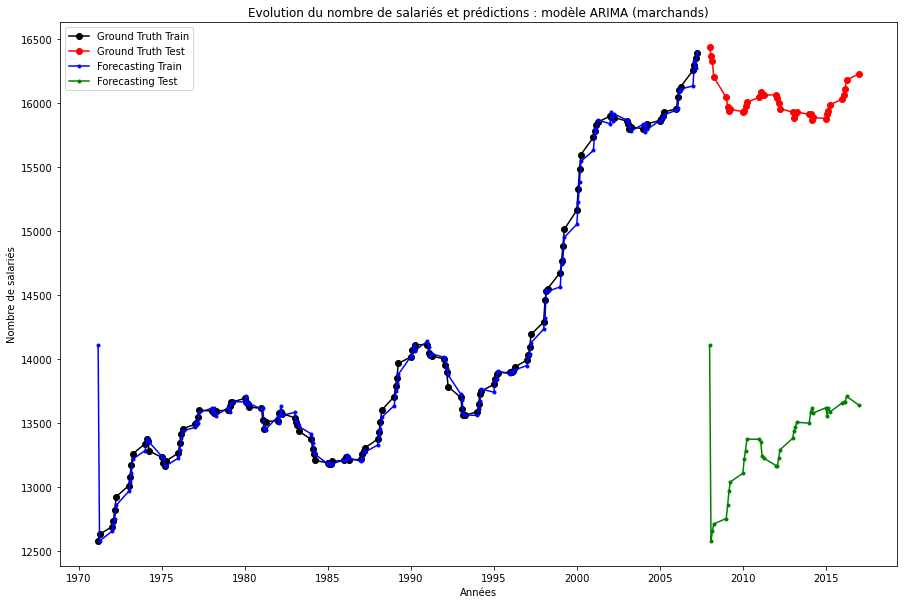

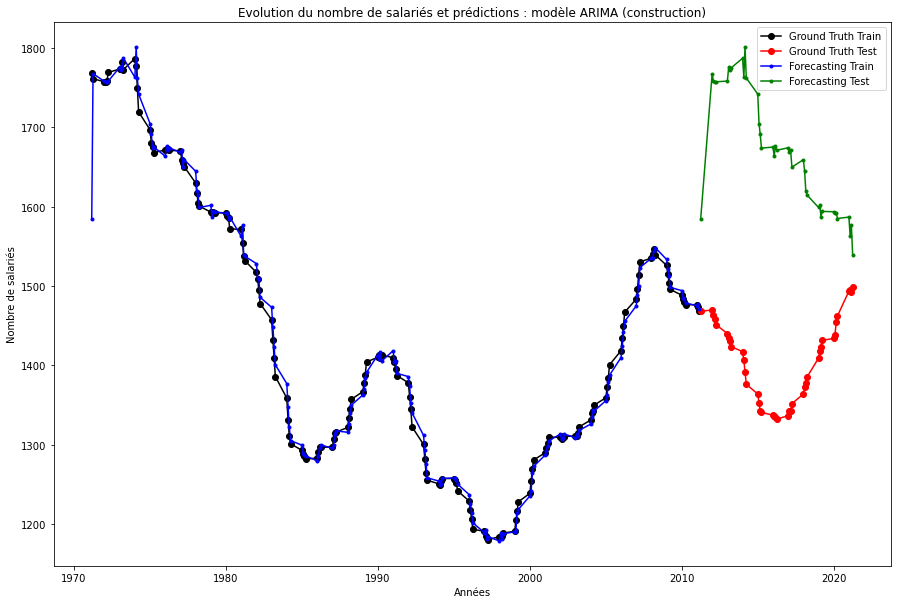

In [105]:
plt.figure(figsize = (15,10))
plt.plot(train_set_marchand.index,df_train_marchand_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(test_set_marchand.index, df_test_marchand_ses, marker="o", color = "red", label = 'Ground Truth Test')
plt.plot(train_set_marchand.index, model_arima_marchand.fittedvalues, marker=".", color="blue", label='Forecasting Train')
plt.plot(test_set_marchand.index, predictions_marchand_arima, marker=".", color = "green", label = 'Forecasting Test')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés et prédictions : modèle ARIMA (marchands)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (15,10))
plt.plot(train_set_construction.index,df_train_construction_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(test_set_construction.index, df_test_construction_ses, marker="o", color = "red", label = 'Ground Truth Test')
plt.plot(train_set_construction.index,model_arima_construction.fittedvalues, marker=".", color="blue", label='Forecasting Train')
plt.plot(test_set_construction.index,predictions_construction_arima, marker=".", color = "green", label = 'Forecasting Test')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés et prédictions : modèle ARIMA (construction)")
plt.legend(loc='best')
plt.show()

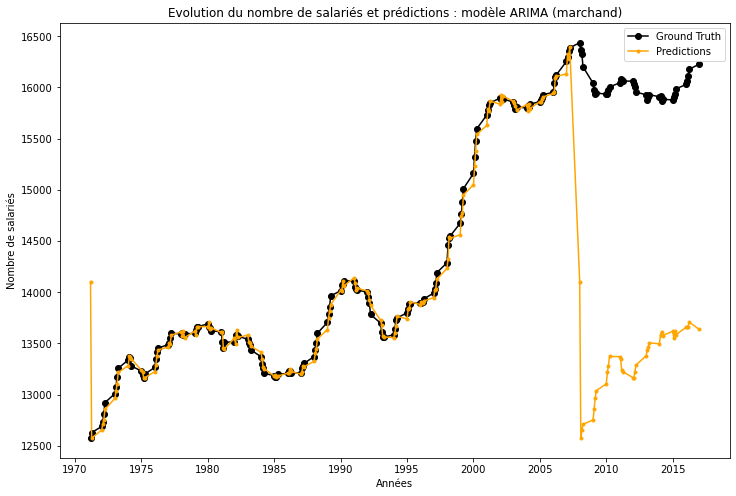

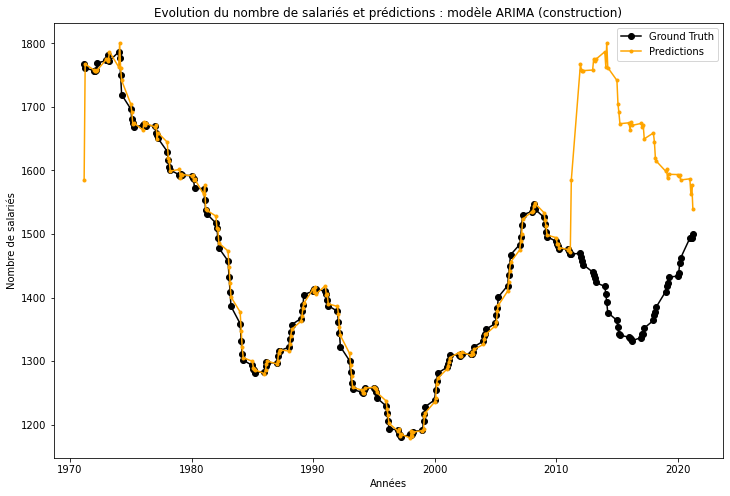

In [106]:
plt.figure(figsize = (12,8))
plt.plot(marchand.index, secteur1['Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].values, marker="o", color="black", label='Ground Truth')
plt.plot(marchand.index,full_curve_marchand_arima, marker=".", color="orange", label='Predictions')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés et prédictions : modèle ARIMA (marchand)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (12,8))
plt.plot(construction.index, secteur2['Emplois salariés trimestriels - Construction - A17 : FZ - CVS'], marker="o", color="black", label='Ground Truth')
plt.plot(construction.index, full_curve_construction_arima, marker=".", color="orange", label='Predictions')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés et prédictions : modèle ARIMA (construction)")
plt.legend(loc='best')
plt.show()

In [107]:
rmse_arima_marchand = np.sqrt(mean_squared_error(df_test_marchand_ses, predictions_marchand_arima))
print("RMSE marchand pour ARIMA: ", rmse_arima_marchand)

rmse_arima_construction = np.sqrt(mean_squared_error(df_test_construction_ses, predictions_construction_arima))
print("RMSE construction pour ARIMA: ", rmse_arima_construction)

RMSE marchand pour ARIMA:  2716.3061271640477
RMSE construction pour ARIMA:  282.72342955405315


### 5.3. 3ème modèle : SARIMA (seasonal autoregressive integrated moving average)

#### 5.3.1. Pour la 1ère BDD : DPAE

On définit nos modèles

In [108]:
sarima_CDD = SARIMAX(df_train_CDD_ses, order = (12, 1, 9)) #(poids du passé, nb itération, poids du futur)
model_sarima_CDD = sarima_CDD.fit()

sarima_CDI = SARIMAX(df_train_CDI_ses, order = (12, 1, 9))
model_sarima_CDI = sarima_CDI.fit()

C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


On génère nos prédictions (avec un IC à 95%)

In [109]:
forecast_values_CDD_sarima = model_sarima_CDD.get_forecast(len(df_test_CDD["DPAE_brut"].index))
forecast_values_CDD_sarima_df = forecast_values_CDD_sarima.conf_int(alpha = 0.05)

forecast_values_CDI_sarima = model_sarima_CDI.get_forecast(len(df_test_CDI["DPAE_brut"].index))
forecast_values_CDI_sarima_df = forecast_values_CDI_sarima.conf_int(alpha = 0.05)

On convertit au bon format (dataframe)

In [110]:
forecast_values_CDD_sarima_df = pd.DataFrame(forecast_values_CDD_sarima_df)
forecast_values_CDI_sarima_df = pd.DataFrame(forecast_values_CDI_sarima_df)

On visualise les résultats

In [111]:
forecast_values_CDD_sarima_df["Predictions"] = model_sarima_CDD.predict(start = forecast_values_CDD_sarima_df.index[0], end = forecast_values_CDD_sarima_df.index[-1])
forecast_values_CDD_sarima_df.index = df_test_CDD["DPAE_brut"].index
predictions_CDD_sarima = forecast_values_CDD_sarima_df["Predictions"] 

forecast_values_CDI_sarima_df["Predictions"] = model_sarima_CDI.predict(start = forecast_values_CDI_sarima_df.index[0], end = forecast_values_CDI_sarima_df.index[-1])
forecast_values_CDI_sarima_df.index = df_test_CDI["DPAE_brut"].index
predictions_CDI_sarima = forecast_values_CDI_sarima_df["Predictions"] 

full_curve_CDD_sarima = np.concatenate((model_sarima_CDD.fittedvalues, forecast_values_CDD_sarima_df["Predictions"]))
full_curve_CDI_sarima = np.concatenate((model_sarima_CDI.fittedvalues, forecast_values_CDI_sarima_df["Predictions"]))

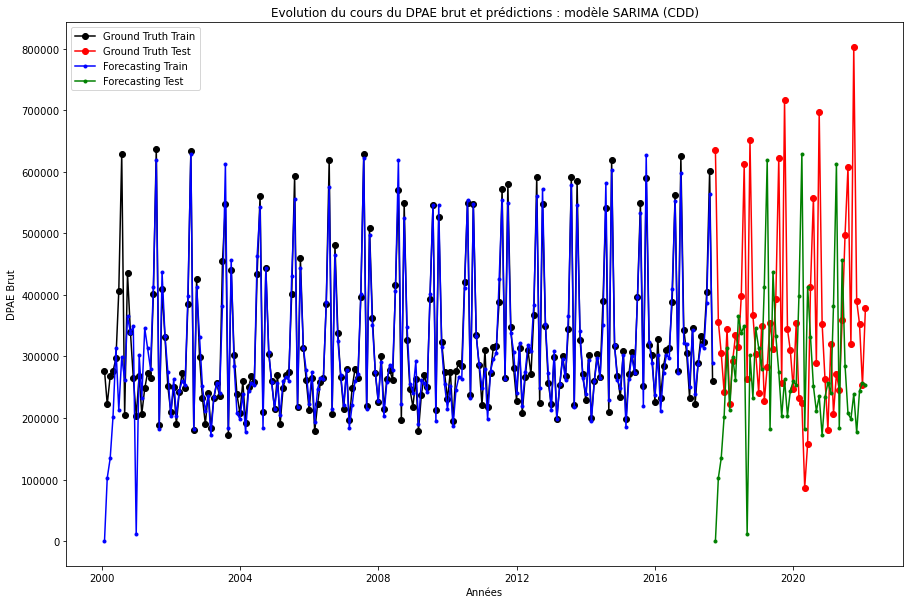

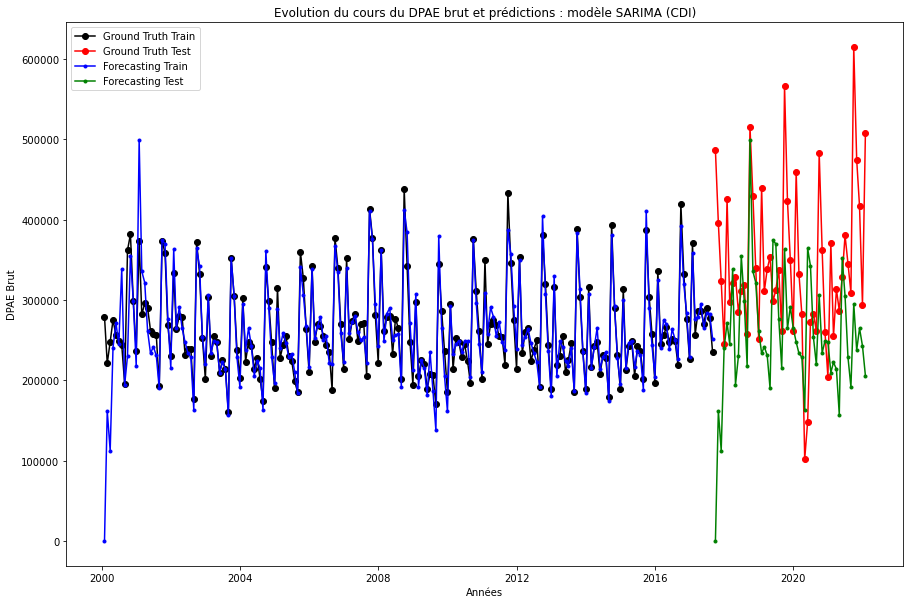

In [112]:
plt.figure(figsize = (15,10))
plt.plot(df_train_CDD.index,df_train_CDD_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(df_test_CDD.index, df_test_CDD["DPAE_brut"], marker="o", color = "red", label = 'Ground Truth Test')
plt.plot(df_train_CDD.index,model_sarima_CDD.fittedvalues, marker=".", color="blue", label='Forecasting Train')
plt.plot(df_test_CDD.index,predictions_CDD_sarima, marker=".", color = "green", label = 'Forecasting Test')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions : modèle SARIMA (CDD)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (15,10))
plt.plot(df_train_CDI.index,df_train_CDI_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(df_test_CDI.index, df_test_CDI["DPAE_brut"], marker="o", color = "red", label = 'Ground Truth Test')
plt.plot(df_train_CDI.index,model_sarima_CDI.fittedvalues, marker=".", color="blue", label='Forecasting Train')
plt.plot(df_test_CDI.index,predictions_CDI_sarima, marker=".", color = "green", label = 'Forecasting Test')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions : modèle SARIMA (CDI)")
plt.legend(loc='best')
plt.show()

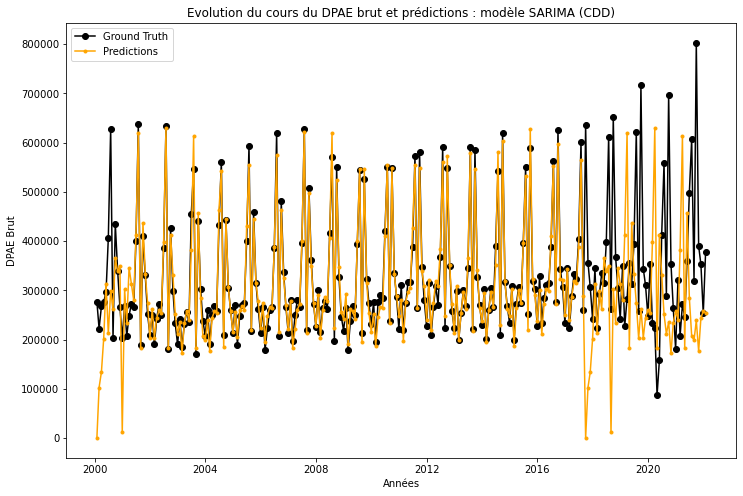

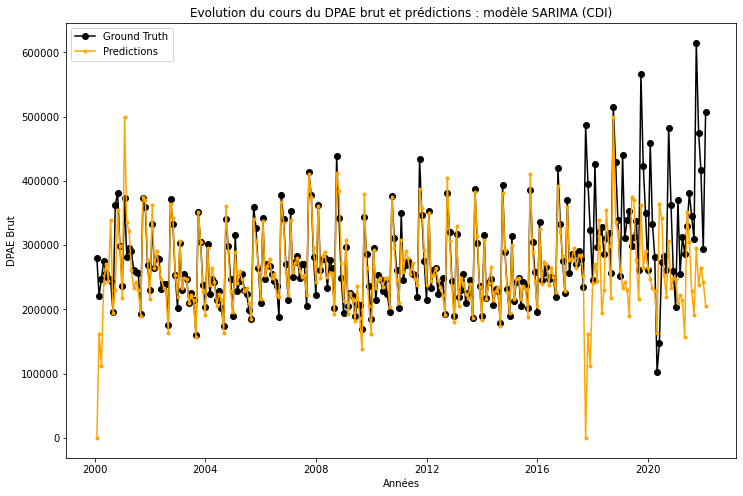

In [113]:
plt.figure(figsize = (12,8))
plt.plot(df_CDD.index, df_CDD['DPAE_brut'], marker="o", color="black", label='Ground Truth')
plt.plot(df_CDD.index,full_curve_CDD_sarima, marker=".", color="orange", label='Predictions')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions : modèle SARIMA (CDD)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (12,8))
plt.plot(df_CDI.index, df_CDI['DPAE_brut'], marker="o", color="black", label='Ground Truth')
plt.plot(df_CDI.index, full_curve_CDI_sarima, marker=".", color="orange", label='Predictions')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions : modèle SARIMA (CDI)")
plt.legend(loc='best')
plt.show()

On vient mesurer nos erreurs pour ce nouveau modèle

In [114]:
rmse_sarima_CDD = np.sqrt(mean_squared_error(df_test_CDD["DPAE_brut"], predictions_CDD_sarima))
print("RMSE CDD pour SARIMA: ", rmse_sarima_CDD)

rmse_sarima_CDI = np.sqrt(mean_squared_error(df_test_CDI["DPAE_brut"], predictions_CDI_sarima))
print("RMSE CDI pour SARIMA: ", rmse_sarima_CDI)

RMSE CDD pour SARIMA:  227976.0664440867
RMSE CDI pour SARIMA:  143762.8895417831


#### 5.3.2. Pour la 2nde BDD : EESSA

In [115]:
sarima_marchand = SARIMAX(df_train_marchand_ses, order = (1, 0, 1)) #(poids du passé, nb itération, poids du futur)
model_sarima_marchand = sarima_marchand.fit()

sarima_construction = SARIMAX(df_train_construction_ses, order = (1, 0, 1))
model_sarima_construction = sarima_construction.fit()

C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [116]:
forecast_values_marchand_sarima = model_sarima_marchand.get_forecast(df_test_marchand_ses.shape[0])
forecast_values_marchand_sarima_df = forecast_values_marchand_sarima.conf_int(alpha = 0.05)

forecast_values_construction_sarima = model_sarima_construction.get_forecast(df_test_construction_ses.shape[0])
forecast_values_construction_sarima_df = forecast_values_construction_sarima.conf_int(alpha = 0.05)

In [117]:
forecast_values_marchand_sarima_df = pd.DataFrame(forecast_values_marchand_sarima_df)
forecast_values_construction_sarima_df = pd.DataFrame(forecast_values_construction_sarima_df)

In [118]:
forecast_values_marchand_sarima_df["Predictions"] = model_sarima_marchand.predict(start = forecast_values_marchand_sarima_df.index[0], end = forecast_values_marchand_sarima_df.index[-1])
forecast_values_marchand_sarima_df.index = test_set_marchand['Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].index
predictions_marchand_sarima = forecast_values_marchand_sarima_df["Predictions"] 

forecast_values_construction_sarima_df["Predictions"] = model_sarima_construction.predict(start = forecast_values_construction_sarima_df.index[0], end = forecast_values_construction_sarima_df.index[-1])
forecast_values_construction_sarima_df.index = test_set_construction['Emplois salariés trimestriels - Construction - A17 : FZ - CVS'].index
predictions_construction_sarima = forecast_values_construction_sarima_df["Predictions"] 

full_curve_marchand_sarima = np.concatenate((model_sarima_marchand.fittedvalues, forecast_values_marchand_sarima_df["Predictions"]))
full_curve_construction_sarima = np.concatenate((model_sarima_construction.fittedvalues, forecast_values_construction_sarima_df["Predictions"]))

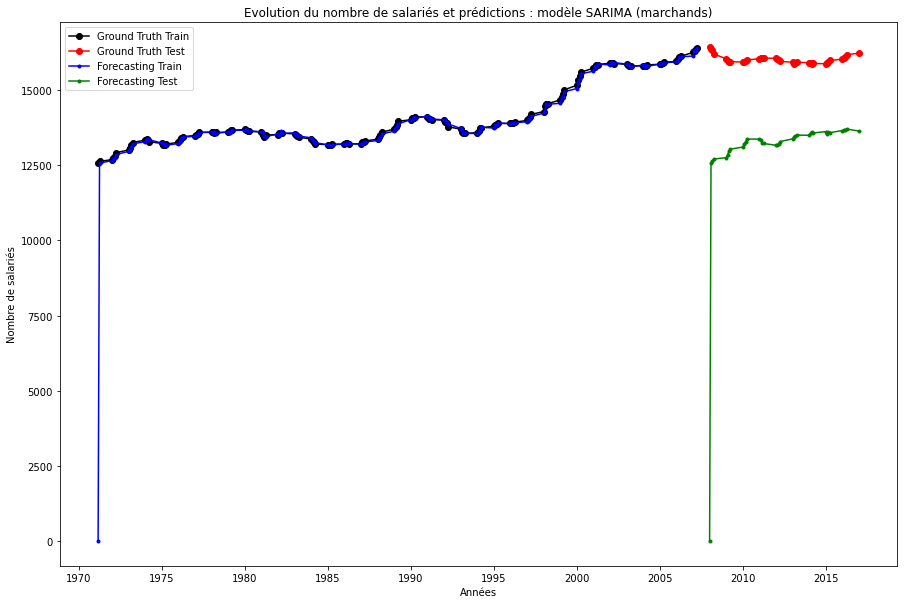

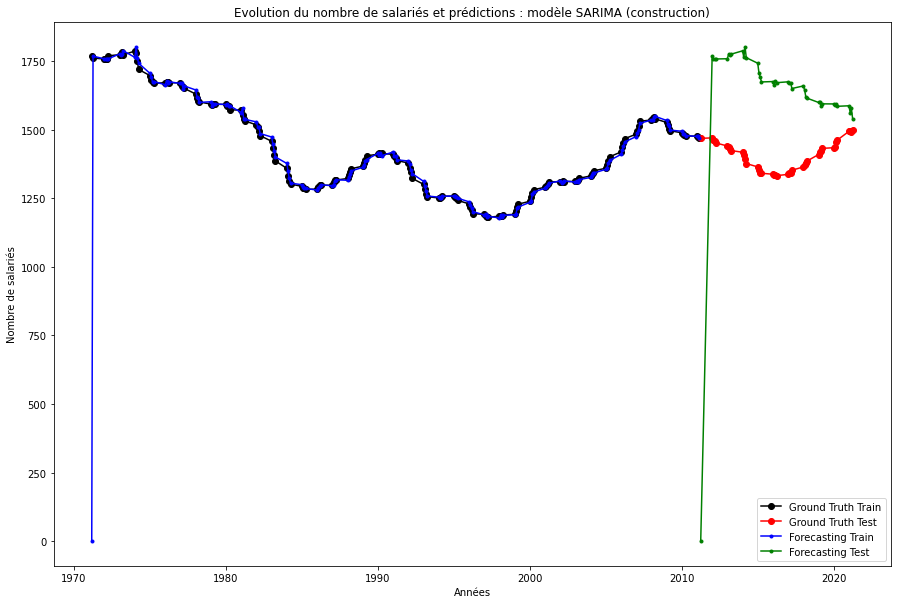

In [119]:
plt.figure(figsize = (15,10))
plt.plot(train_set_marchand.index,df_train_marchand_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(test_set_marchand.index, df_test_marchand_ses, marker="o", color = "red", label = 'Ground Truth Test')
plt.plot(train_set_marchand.index, model_sarima_marchand.fittedvalues, marker=".", color="blue", label='Forecasting Train')
plt.plot(test_set_marchand.index, predictions_marchand_sarima, marker=".", color = "green", label = 'Forecasting Test')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés et prédictions : modèle SARIMA (marchands)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (15,10))
plt.plot(train_set_construction.index,df_train_construction_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(test_set_construction.index, df_test_construction_ses, marker="o", color = "red", label = 'Ground Truth Test')
plt.plot(train_set_construction.index,model_sarima_construction.fittedvalues, marker=".", color="blue", label='Forecasting Train')
plt.plot(test_set_construction.index,predictions_construction_sarima, marker=".", color = "green", label = 'Forecasting Test')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés et prédictions : modèle SARIMA (construction)")
plt.legend(loc='best')
plt.show()

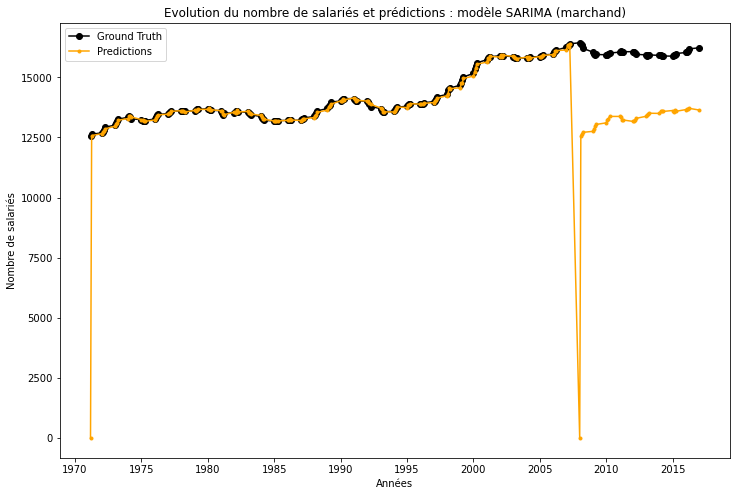

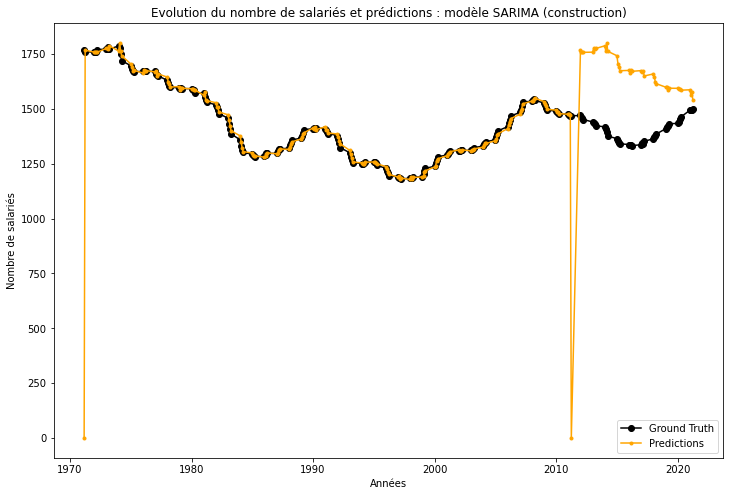

In [120]:
plt.figure(figsize = (12,8))
plt.plot(marchand.index, secteur1['Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].values, marker="o", color="black", label='Ground Truth')
plt.plot(marchand.index,full_curve_marchand_sarima, marker=".", color="orange", label='Predictions')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés et prédictions : modèle SARIMA (marchand)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (12,8))
plt.plot(construction.index, secteur2['Emplois salariés trimestriels - Construction - A17 : FZ - CVS'], marker="o", color="black", label='Ground Truth')
plt.plot(construction.index, full_curve_construction_sarima, marker=".", color="orange", label='Predictions')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés et prédictions : modèle SARIMA (construction)")
plt.legend(loc='best')
plt.show()

In [121]:
rmse_sarima_marchand = np.sqrt(mean_squared_error(df_test_marchand_ses, predictions_marchand_sarima))
print("RMSE marchand pour SARIMA: ", rmse_sarima_marchand)

rmse_sarima_construction = np.sqrt(mean_squared_error(df_test_construction_ses, predictions_construction_sarima))
print("RMSE construction pour SARIMA: ", rmse_sarima_construction)

RMSE marchand pour SARIMA:  3812.645509464788
RMSE construction pour SARIMA:  363.669837944682


### 5.4. 4ème modèle : None seasonal Holt Winter's exponential smoothing

#### 5.4.1. Pour la seconde BDD : EESSA

In [122]:
holt_marchand = Holt(df_train_marchand_ses, initialization_method="estimated")
model_holt_marchand = holt_marchand.fit(smoothing_level=0.2, smoothing_trend=0.2)

holt_construction = Holt(df_train_construction_ses, initialization_method="estimated")
model_holt_construction = holt_construction.fit(smoothing_level=0.2, smoothing_trend=0.2)

In [123]:
forecast_values_marchand_holt = model_holt_marchand.forecast(df_test_marchand_ses.shape[0])
forecast_values_construction_holt = model_holt_construction.forecast(df_test_construction_ses.shape[0])

full_curve_marchand_holt = np.concatenate((model_holt_marchand.fittedvalues, forecast_values_marchand_holt))
full_curve_construction_holt = np.concatenate((model_holt_construction.fittedvalues, forecast_values_construction_holt))

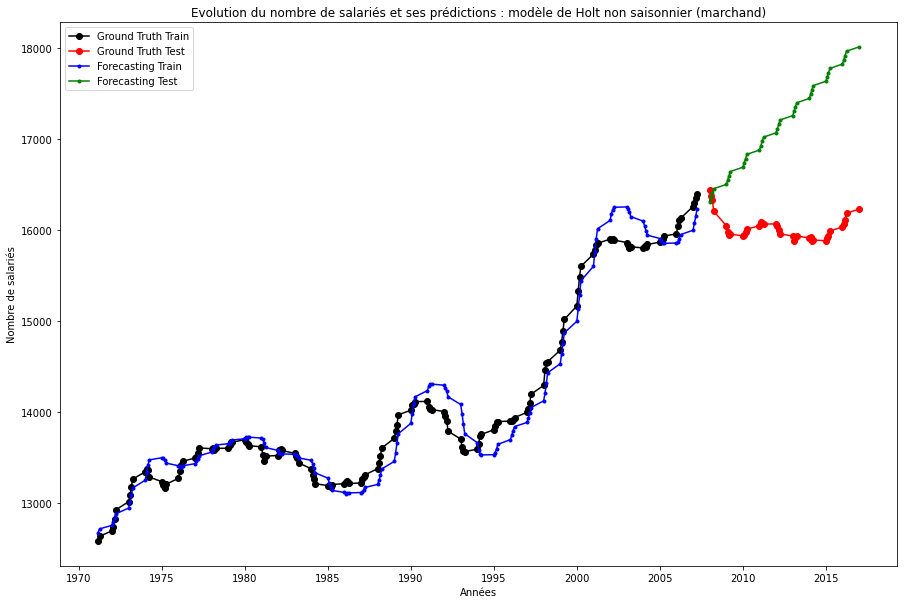

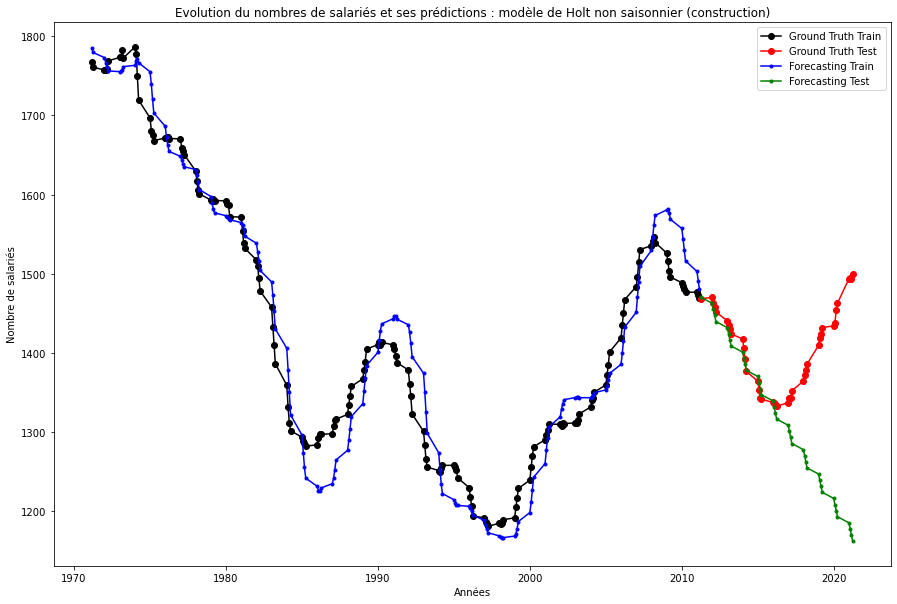

In [124]:
plt.figure(figsize = (15,10))
plt.plot(train_set_marchand.index,df_train_marchand_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(test_set_marchand.index, df_test_marchand_ses, marker="o", color = "red", label = 'Ground Truth Test')
plt.plot(train_set_marchand.index,model_holt_marchand.fittedvalues, marker=".", color="blue", label='Forecasting Train')
plt.plot(test_set_marchand.index,forecast_values_marchand_holt, marker=".", color = "green", label = 'Forecasting Test')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés et ses prédictions : modèle de Holt non saisonnier (marchand)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (15,10))
plt.plot(train_set_construction.index,df_train_construction_ses, marker="o", color="black", label='Ground Truth Train')
plt.plot(test_set_construction.index, df_test_construction_ses, marker="o", color = "red", label = 'Ground Truth Test')
plt.plot(train_set_construction.index,model_holt_construction.fittedvalues, marker=".", color="blue", label='Forecasting Train')
plt.plot(test_set_construction.index,forecast_values_construction_holt, marker=".", color = "green", label = 'Forecasting Test')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombres de salariés et ses prédictions : modèle de Holt non saisonnier (construction)")
plt.legend(loc='best')
plt.show()

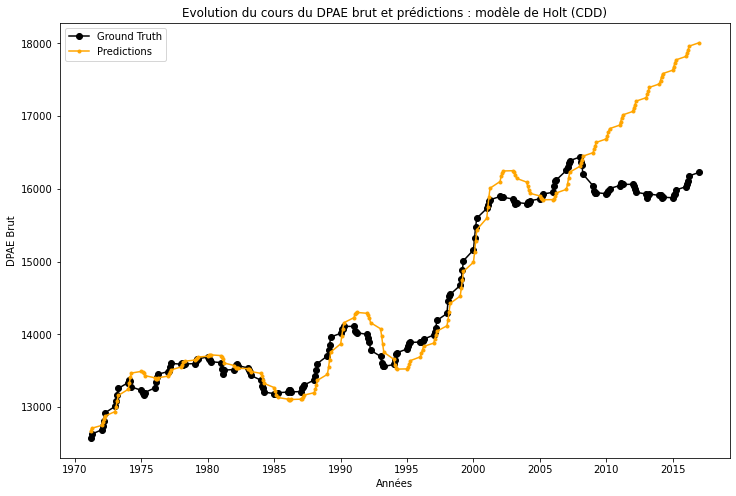

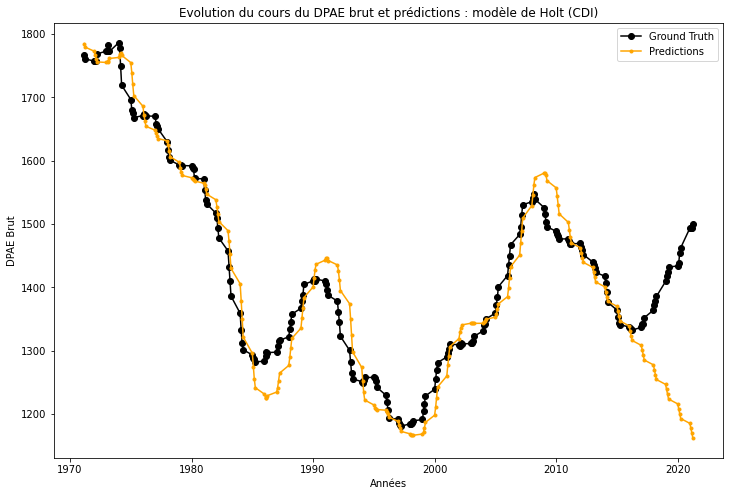

In [125]:
plt.figure(figsize = (12,8))
plt.plot(marchand.index, secteur1['Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'].values, marker="o", color="black", label='Ground Truth')
plt.plot(marchand.index,full_curve_marchand_holt, marker=".", color="orange", label='Predictions')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions : modèle de Holt (CDD)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (12,8))
plt.plot(construction.index, secteur2['Emplois salariés trimestriels - Construction - A17 : FZ - CVS'], marker="o", color="black", label='Ground Truth')
plt.plot(construction.index,full_curve_construction_holt, marker=".", color="orange", label='Predictions')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Evolution du cours du DPAE brut et prédictions : modèle de Holt (CDI)")
plt.legend(loc='best')
plt.show()

In [126]:
rmse_marchand_holt = np.sqrt(mean_squared_error(df_test_marchand_ses,forecast_values_marchand_holt))
print("RMSE marchand avec Holt:",rmse_marchand_holt)

rmse_construction_holt = np.sqrt(mean_squared_error(df_test_construction_ses,forecast_values_construction_holt))
print("RMSE construction avec Holt :",rmse_construction_holt)

RMSE marchand avec Holt: 1266.7405927328991
RMSE construction avec Holt : 144.08973514215785


#### Le but de ce filtre est d'avoir une bonne prédiction en cas d'abscence de saisonnalité. Ce qui ne correspond absolument pas à notre 1ère BDD (CDD/CDI) donc nous n'utilisons pas ce modèle pour une telle BDD.

**Globalement nous remarquons des problèmes avec nos modèles ARIMA et SARIMA. Nous n'arrivons pas à gérer l'erreur notamment de la première valeur ni à trouver les paramètres order optimaux (pour la construction et le marchand en tout cas). Ainsi nous ne pouvons ni discuter la pertinence de ces modèles ni de l'erreur puisque la valeur initiale commençant à 0 vient fausser toute l'analyse.**

# 6. Question 6 : Bonus cadeau

### 6.1. Prédictions pour la BDD : DPAE

**Avec les différents modèles que nous avons pu tester précédemment, on remarque que c'est le modèle : Holt Winter's Seasonal Model qui nous permet d'avoir une erreur la plus petite. En effet l'erreur avec un tel modèle est divisée par 2 voir par 3 par rapport aux autres modèles que nous avons pu tester même si l'erreur reste encore trop élevée.**

In [127]:
bonus_holt_CDD = ExponentialSmoothing(df_CDD['DPAE_brut'], seasonal_periods = 12, trend = "add", seasonal = "add", use_boxcox = False, initialization_method = "heuristic") 
bonus_model_holt_CDD = bonus_holt_CDD.fit()

bonus_holt_CDI = ExponentialSmoothing(df_CDI['DPAE_brut'], seasonal_periods = 12, trend = "add", seasonal = "add", use_boxcox = False, initialization_method = "heuristic") 
bonus_model_holt_CDI = bonus_holt_CDI.fit()

C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


#### On veut prédire de février à mai 2022 soit les 4 prochains mois pour nos CDI et CDD

In [128]:
bonus_forecast_values_CDD_holt = bonus_model_holt_CDD.forecast(4)
bonus_forecast_values_CDI_holt = bonus_model_holt_CDI.forecast(4)

bonus_full_curve_CDD = np.concatenate((bonus_model_holt_CDD.fittedvalues, bonus_forecast_values_CDD_holt))
bonus_full_curve_CDI = np.concatenate((bonus_model_holt_CDI.fittedvalues, bonus_forecast_values_CDI_holt))

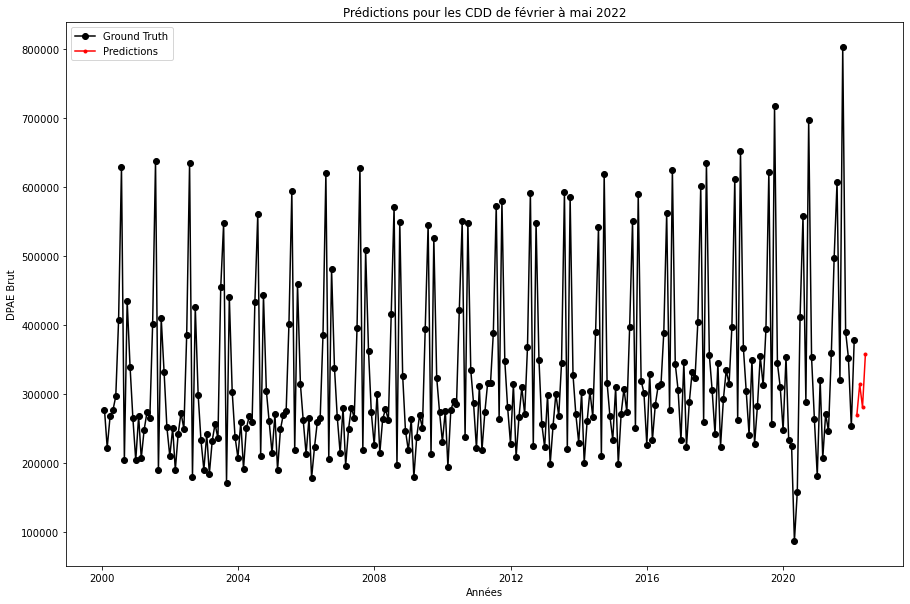

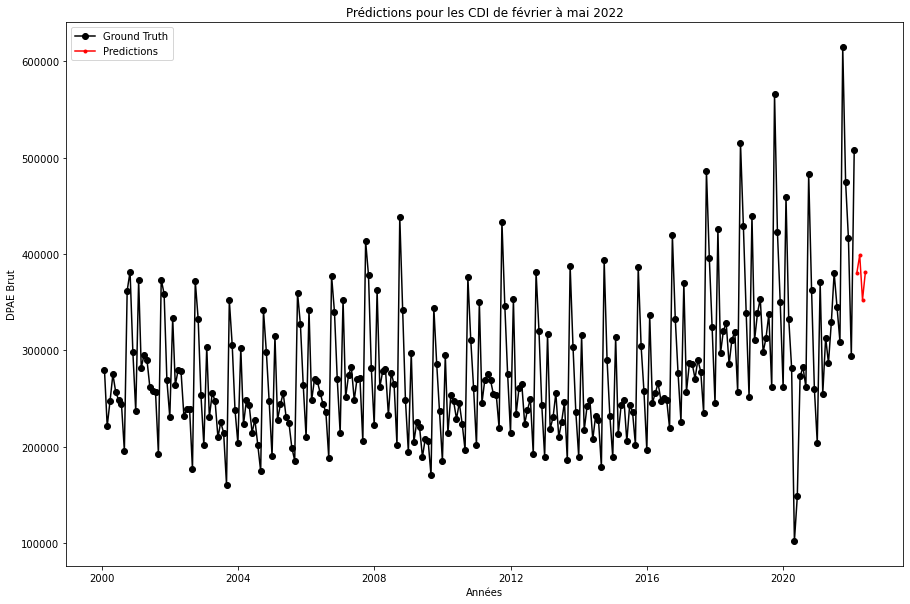

In [129]:
plt.figure(figsize = (15,10))
plt.plot(df_CDD.index, df_CDD["DPAE_brut"], marker="o", color = "black", label = 'Ground Truth')
plt.plot(bonus_forecast_values_CDD_holt, marker=".", color = "red", label = 'Predictions')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Prédictions pour les CDD de février à mai 2022")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (15,10))
plt.plot(df_CDI.index, df_CDI["DPAE_brut"], marker="o", color = "black", label = 'Ground Truth')
plt.plot(bonus_forecast_values_CDI_holt, marker=".", color = "red", label = 'Predictions')
plt.ylabel("DPAE Brut")
plt.xlabel("Années")
plt.title("Prédictions pour les CDI de février à mai 2022")
plt.legend(loc='best')
plt.show()

In [130]:
print("On estime donc respectivement pour les CDD et les CDI :",int(bonus_forecast_values_CDD_holt[0]), "et", int(bonus_forecast_values_CDI_holt[0]), "déclarations brut en février 2022")

print("On estime donc respectivement pour les CDD et les CDI :",int(bonus_forecast_values_CDD_holt[1]), "et", int(bonus_forecast_values_CDI_holt[1]), "déclarations brut en mars 2022")

print("On estime donc respectivement pour les CDD et les CDI :",int(bonus_forecast_values_CDD_holt[2]), "et", int(bonus_forecast_values_CDI_holt[2]), "déclarations brut en avril 2022")

print("On estime donc respectivement pour les CDD et les CDI :",int(bonus_forecast_values_CDD_holt[3]), "et", int(bonus_forecast_values_CDI_holt[3]), "déclarations brut en mai 2022")

On estime donc respectivement pour les CDD et les CDI : 268945 et 380331 déclarations brut en février 2022
On estime donc respectivement pour les CDD et les CDI : 314001 et 398937 déclarations brut en mars 2022
On estime donc respectivement pour les CDD et les CDI : 280873 et 352686 déclarations brut en avril 2022
On estime donc respectivement pour les CDD et les CDI : 357596 et 381616 déclarations brut en mai 2022


### 6.2. Prédictions pour la BDD : EESSA

**Comme les modèles Arima et Sarima ne semblent pas fonctionner ou pas correctement, nous utiliserons le modèle suivant :None seasonal Holt Winter's exponential smoothing. Il semble également pertinent de le prendre puisque nous ne remarquons aucune saisonnalité dans le secteur marchand ou de la construction.**

In [131]:
bonus_holt_marchand = Holt(marchand['Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'], initialization_method="estimated")
bonus_model_holt_marchand = bonus_holt_marchand.fit(smoothing_level=0.2, smoothing_trend=0.2)

bonus_holt_construction = Holt(construction['Emplois salariés trimestriels - Construction - A17 : FZ - CVS'], initialization_method="estimated")
bonus_model_holt_construction = bonus_holt_construction.fit(smoothing_level=0.2, smoothing_trend=0.2)

C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Louis\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### On veut prédire les emplois du 1er trimestre de 2022 (soit 20 trimestres après le dernier du dataframe)

In [132]:
bonus_forecast_values_marchand_holt = model_holt_marchand.forecast(20)
bonus_forecast_values_construction_holt = model_holt_construction.forecast(20)

bonus_full_curve_marchand_holt = np.concatenate((bonus_model_holt_marchand.fittedvalues, bonus_forecast_values_marchand_holt))
bonus_full_curve_construction_holt = np.concatenate((bonus_model_holt_construction.fittedvalues, bonus_forecast_values_construction_holt))

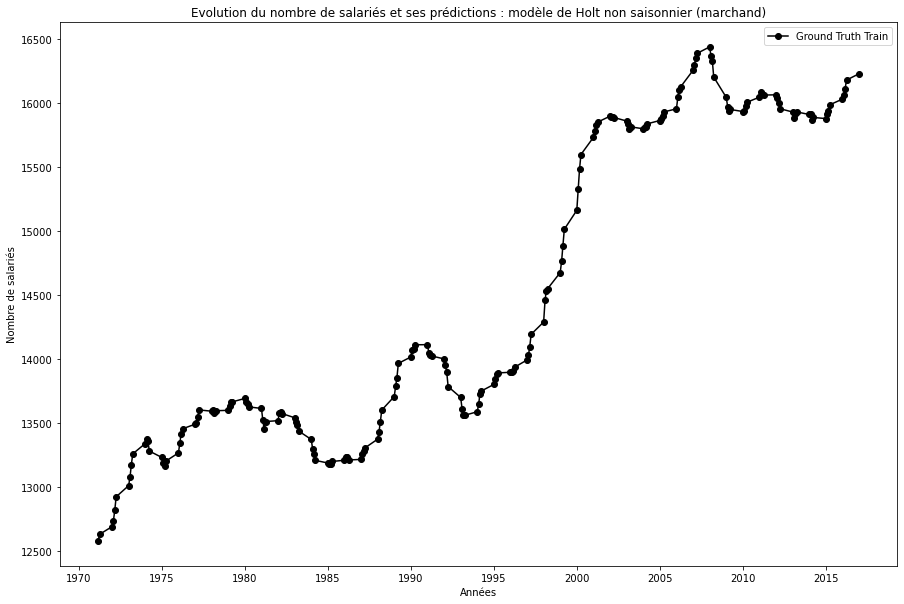

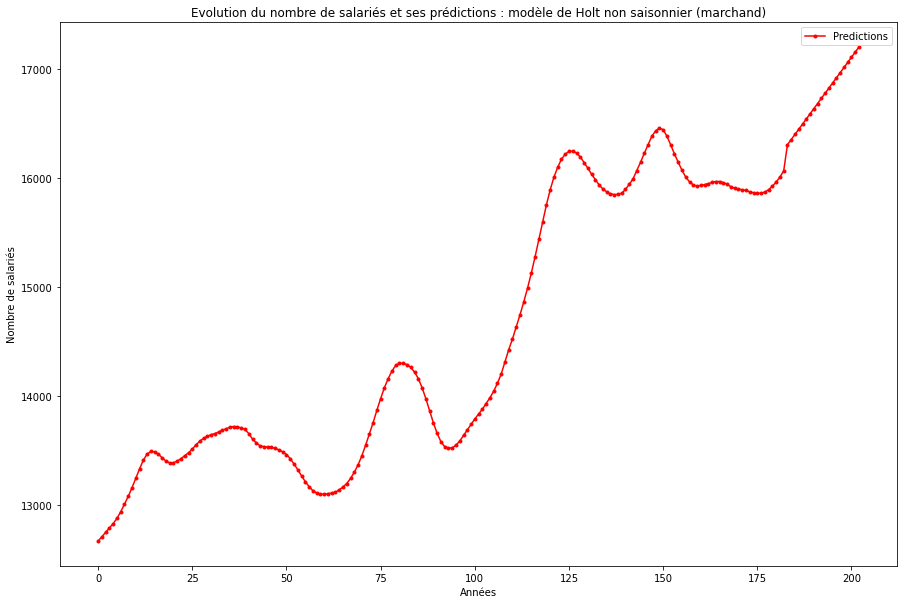

In [133]:
plt.figure(figsize = (15,10))
plt.plot(marchand.index, marchand['Emplois salariés trimestriels - Secteurs principalement marchands - Toutes sections hors A, O, P, Q et U - CVS - Série arrêtée'],marker="o", color="black", label='Ground Truth Train')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés et ses prédictions : modèle de Holt non saisonnier (marchand)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (15,10))
plt.plot(bonus_full_curve_marchand_holt, marker=".", color = "red", label = 'Predictions')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombre de salariés et ses prédictions : modèle de Holt non saisonnier (marchand)")
plt.legend(loc='best')
plt.show()

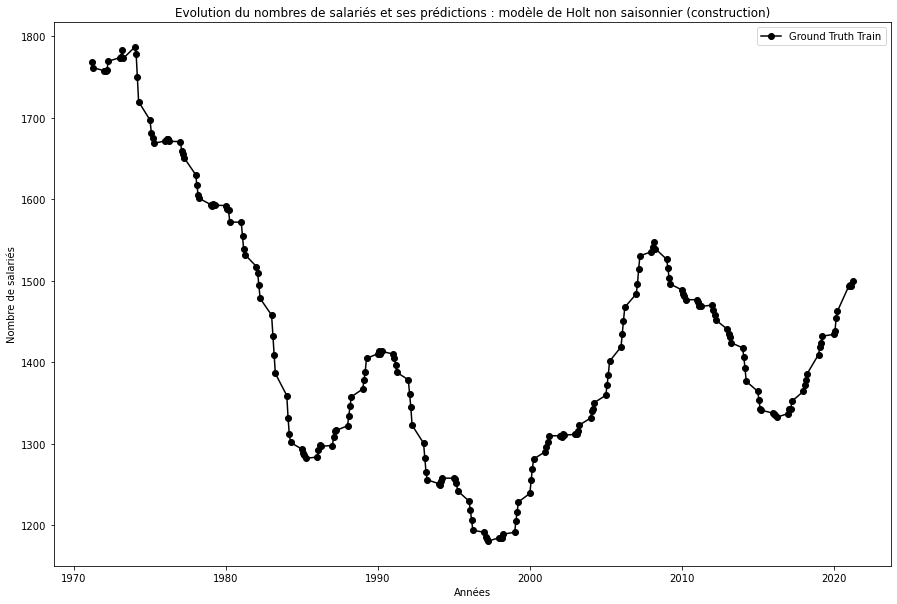

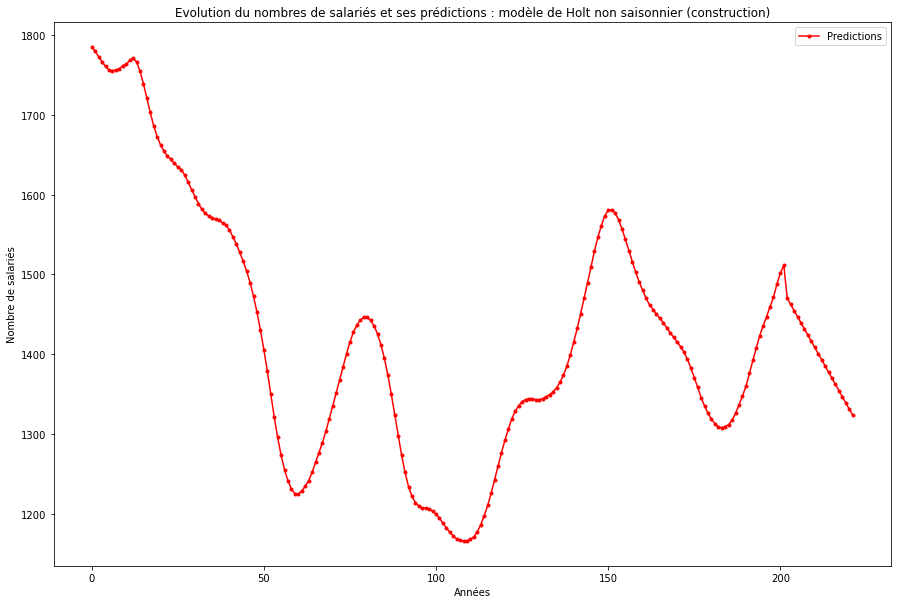

In [134]:
plt.figure(figsize = (15,10))
plt.plot(construction.index, construction['Emplois salariés trimestriels - Construction - A17 : FZ - CVS'],marker="o", color="black", label='Ground Truth Train')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombres de salariés et ses prédictions : modèle de Holt non saisonnier (construction)")
plt.legend(loc='best')
plt.show()

plt.figure(figsize = (15,10))
plt.plot(bonus_full_curve_construction_holt, marker=".", color = "red", label = 'Predictions')
plt.ylabel("Nombre de salariés")
plt.xlabel("Années")
plt.title("Evolution du nombres de salariés et ses prédictions : modèle de Holt non saisonnier (construction)")
plt.legend(loc='best')
plt.show()

In [135]:
print("Pour le 1er trimestre de 2022, on estime respectivement :", int(bonus_forecast_values_marchand_holt[19]),"et", int(bonus_forecast_values_construction_holt[19]), "salariés dans le secteur marchand et dans le secteur de la construction.")

Pour le 1er trimestre de 2022, on estime respectivement : 17205 et 1323 salariés dans le secteur marchand et dans le secteur de la construction.
